In [1]:
# === DATA & VISUALIZATION LIBRARIES ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === STATISTICAL TESTS ===
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

# === ML MODEL SELECTION & VALIDATION ===
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    RandomizedSearchCV
)

# === ML MODELS ===
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# === ML PIPELINE & PREPROCESSING ===
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# === ML METRICS ===
from sklearn.metrics import accuracy_score, classification_report

# === MODEL PERSISTENCE ===
import joblib

# === PATH FOR MODULE IMPORTS ===
import sys
sys.path.append('../main')

# === NOTEBOOK PLOTTING MAGIC ===
%matplotlib inline


COMPREHENSIVE EXPLORATORY DATA ANALYSIS
Shape: (18991, 14)
Columns: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country', 'income', 'age_group']
<class 'pandas.core.frame.DataFrame'>
Index: 18991 entries, 4232 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             18991 non-null  int64   
 1   workclass       18241 non-null  object  
 2   fnlwgt          18991 non-null  int64   
 3   education       18991 non-null  object  
 4   education_num   18991 non-null  int64   
 5   marital_status  18991 non-null  object  
 6   occupation      18239 non-null  object  
 7   relationship    18991 non-null  object  
 8   race            18991 non-null  object  
 9   sex             18991 non-null  object  
 10  hours_per_week  18991 non-null  int64   
 11  native_country  18665 non-null  object

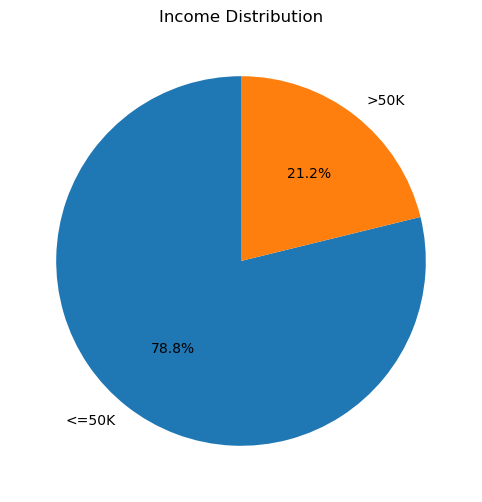

Business Insight: Majority respondents belong to the <=50K group, indicating class imbalance and potential bias in prediction models.

>>> Count Plots by Income


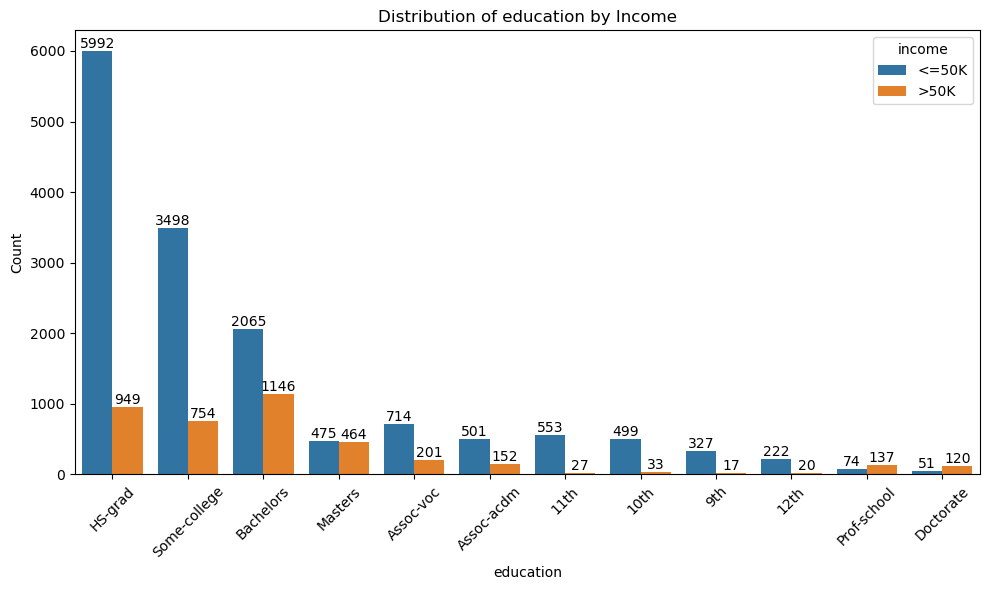

Business Insight: Higher education levels show more >50K predictions, confirming education as a powerful driver of income.


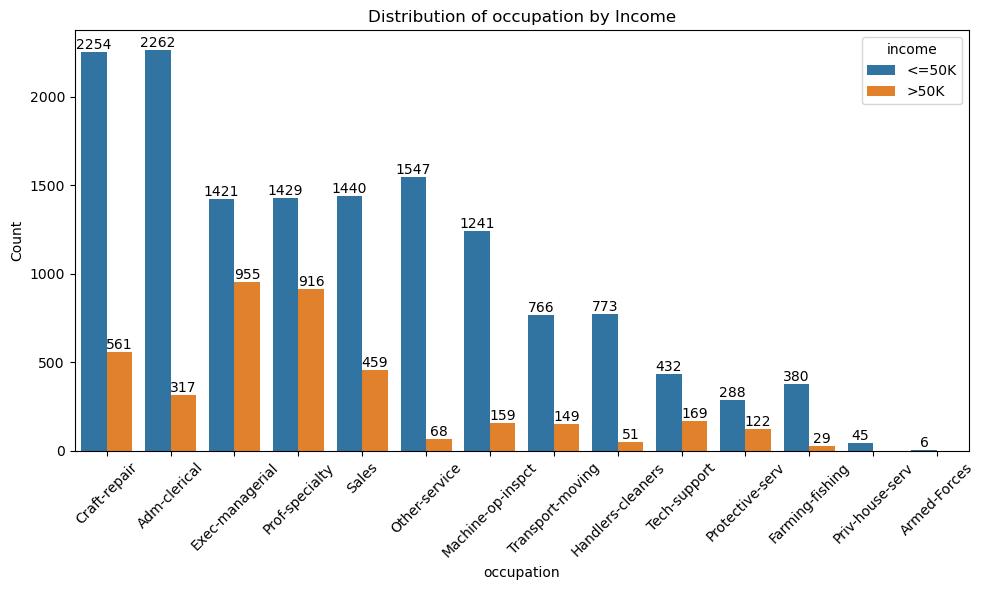

Business Insight: Data highlights which occupations are more likely to command higher salaries.


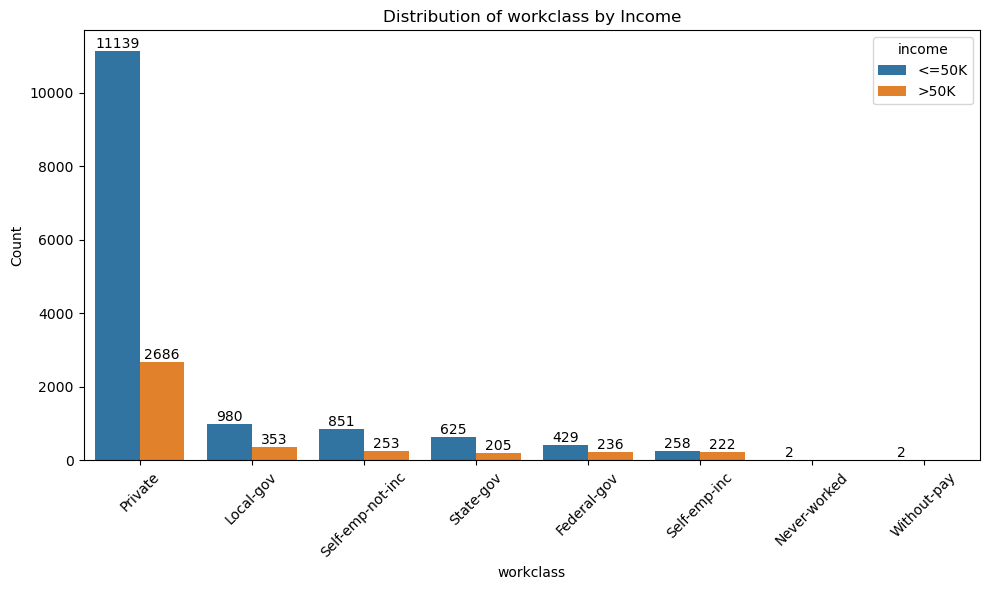

Business Insight: workclass impacts income distribution, showing demographic and categorical effects.


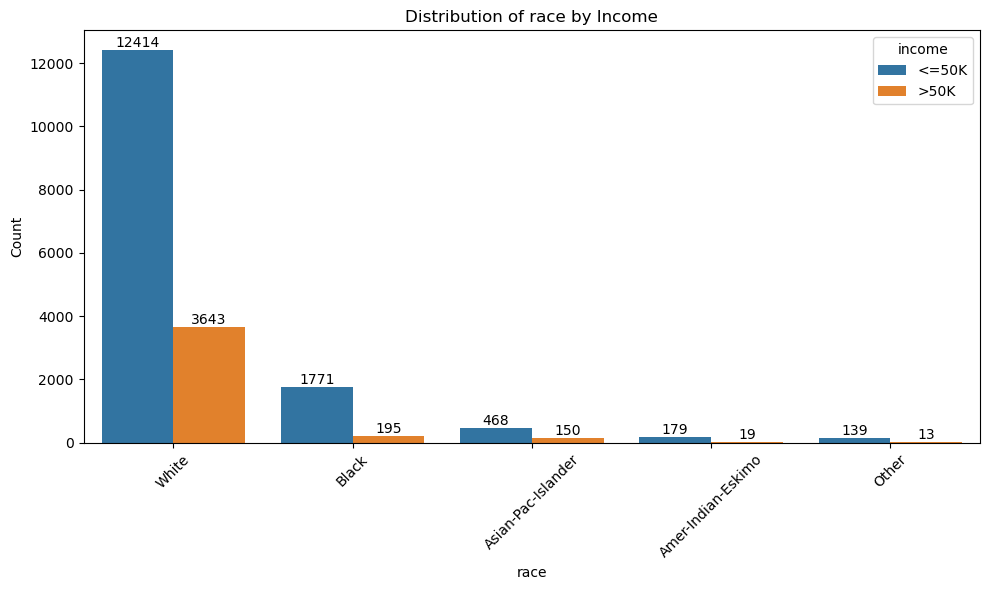

Business Insight: race impacts income distribution, showing demographic and categorical effects.


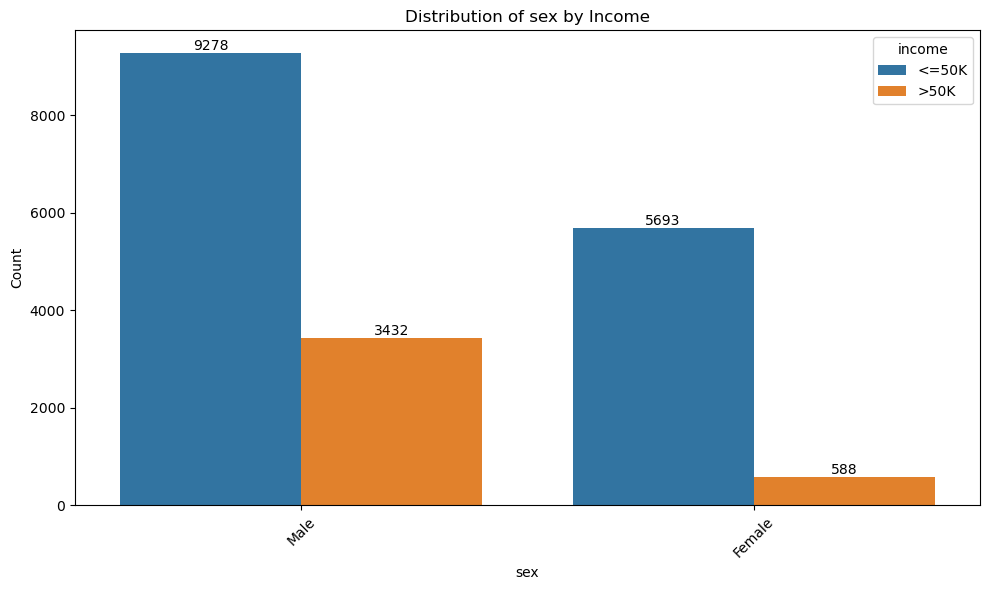

Business Insight: Gender disparities are observable and may warrant pay equity monitoring.


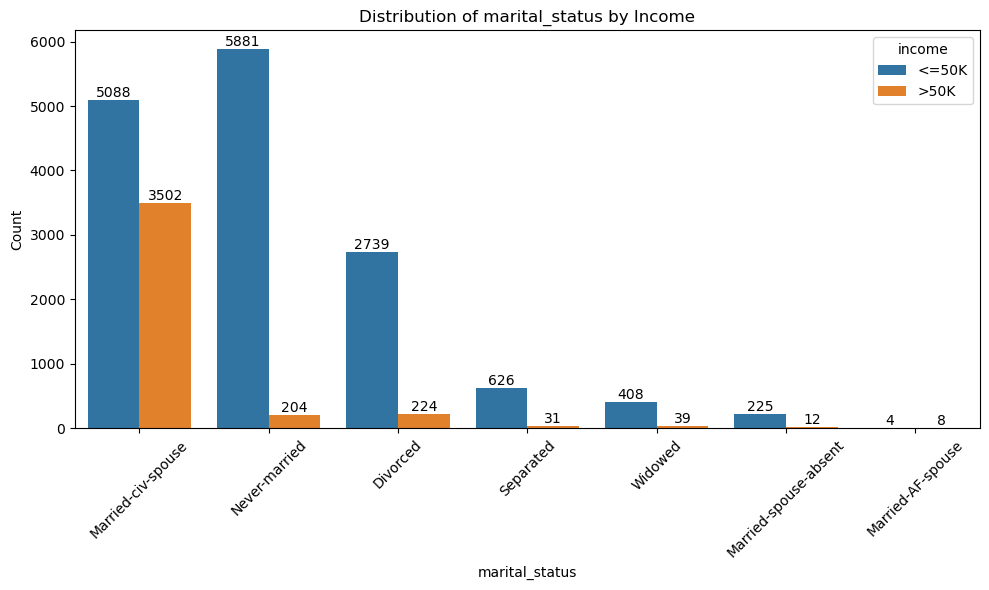

Business Insight: marital_status impacts income distribution, showing demographic and categorical effects.


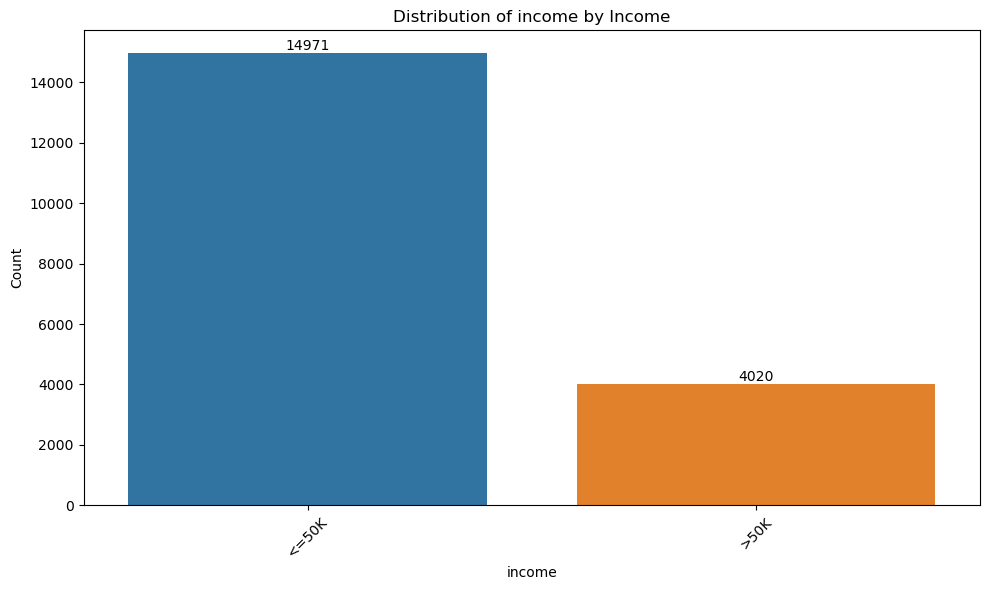

Business Insight: income impacts income distribution, showing demographic and categorical effects.


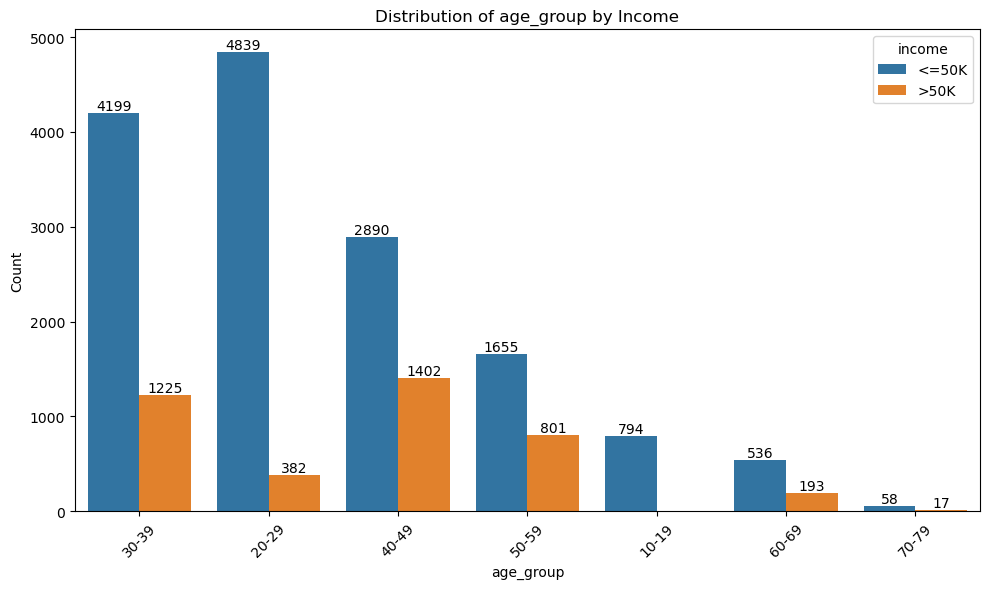

Business Insight: age_group impacts income distribution, showing demographic and categorical effects.

>>> Count Plots by Sex


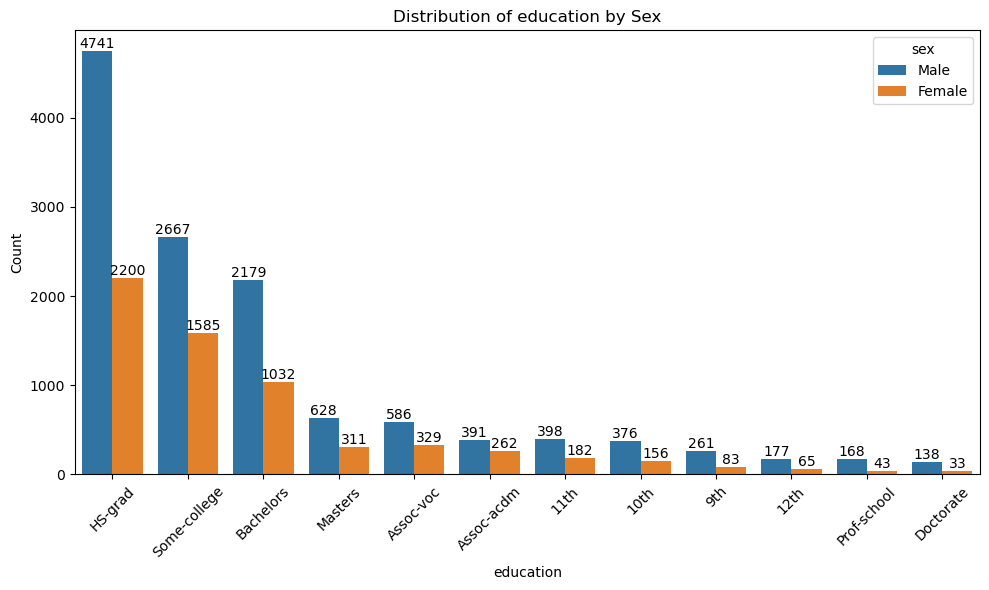

Business Insight: Reveals how demographic and categorical variables break down by gender.


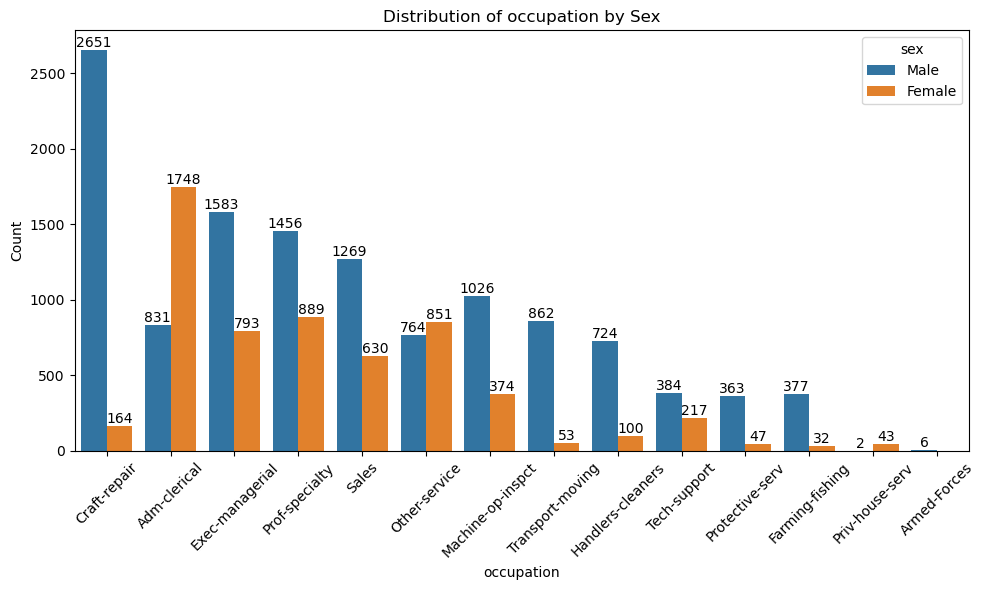

Business Insight: Reveals how demographic and categorical variables break down by gender.


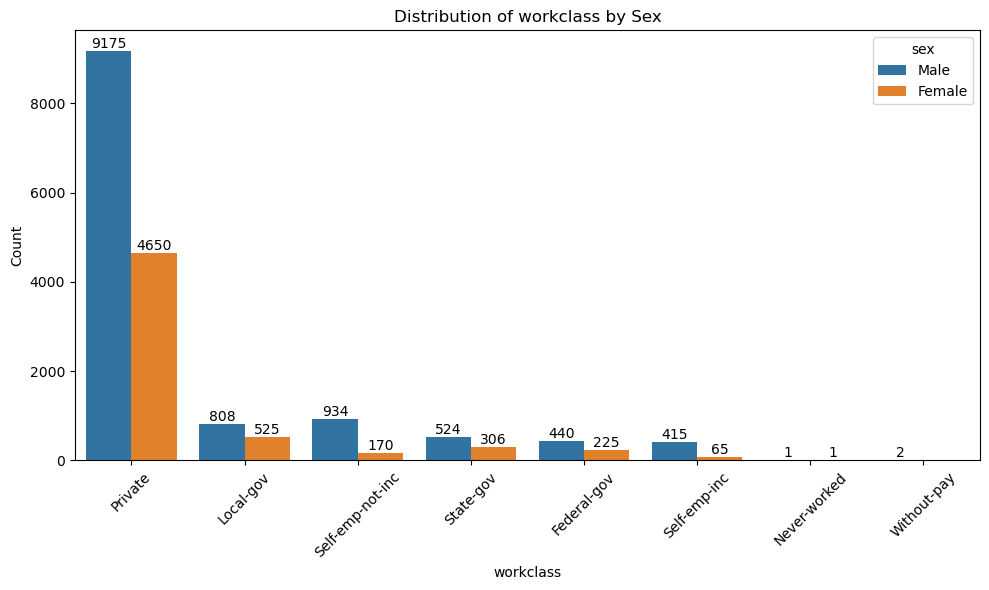

Business Insight: Reveals how demographic and categorical variables break down by gender.


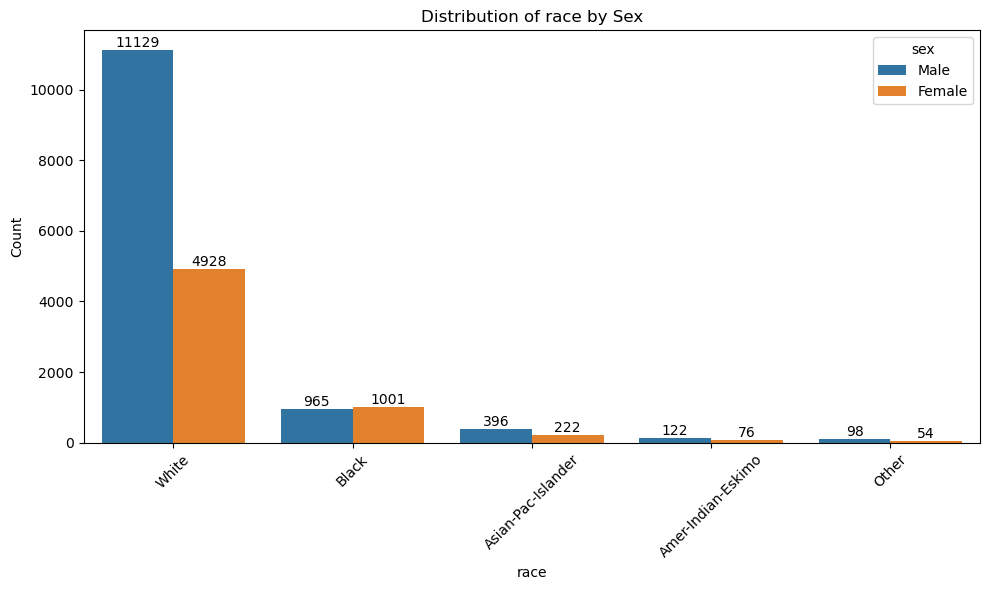

Business Insight: Reveals how demographic and categorical variables break down by gender.


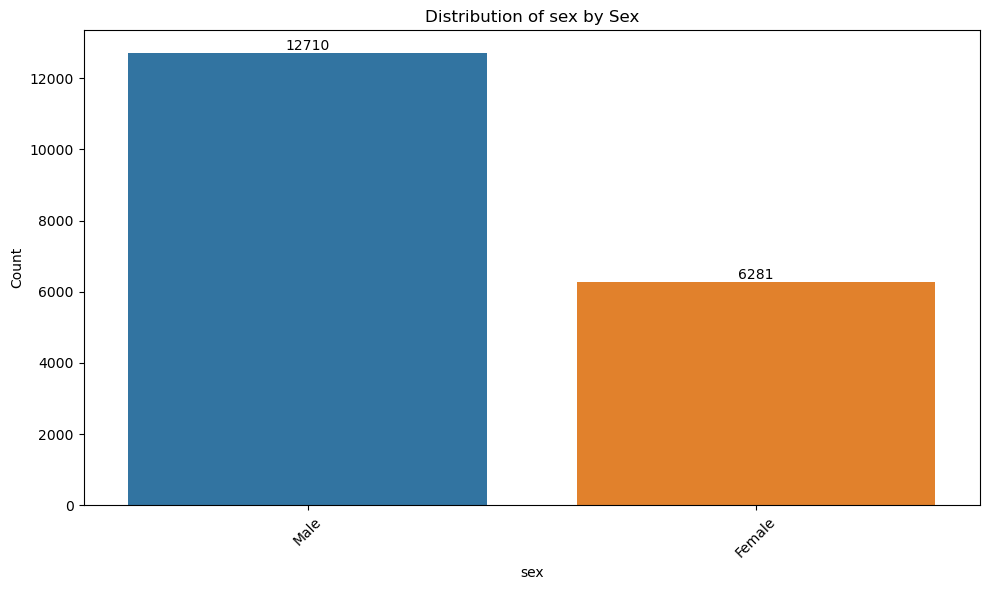

Business Insight: Reveals how demographic and categorical variables break down by gender.


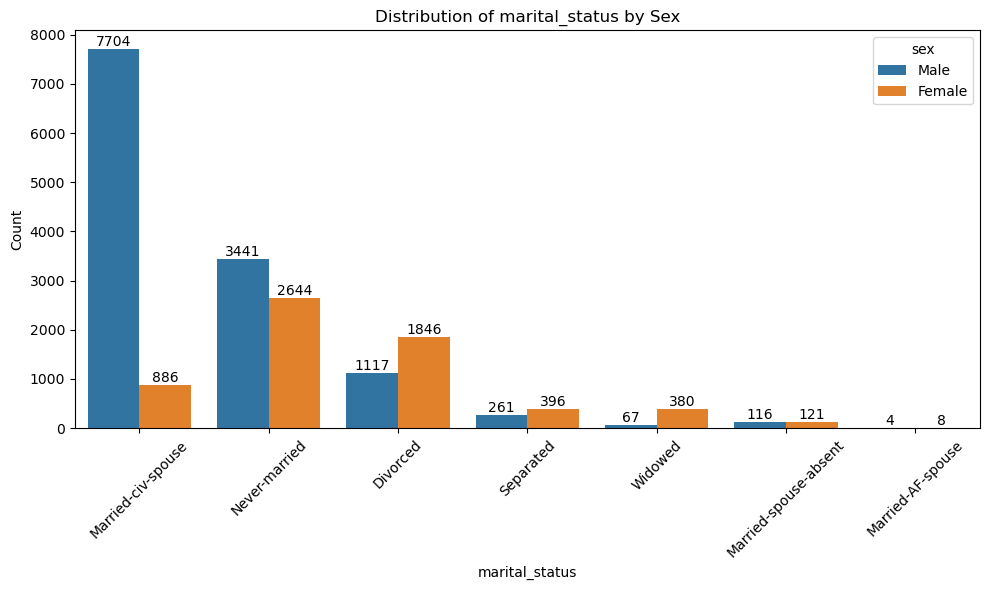

Business Insight: Reveals how demographic and categorical variables break down by gender.


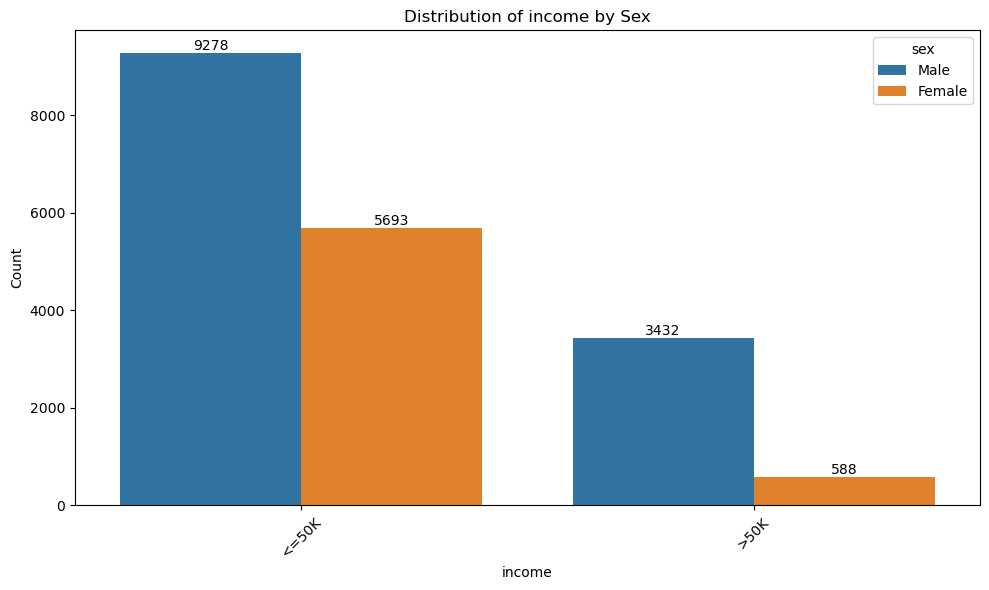

Business Insight: Reveals how demographic and categorical variables break down by gender.


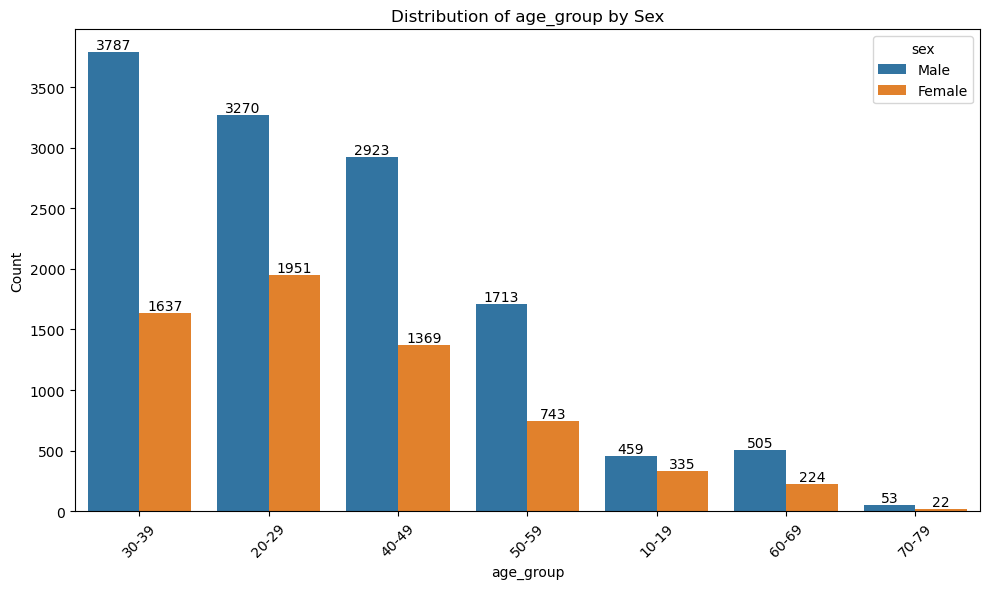

Business Insight: Reveals how demographic and categorical variables break down by gender.

>>> Initial Box Plots (before outlier removal)


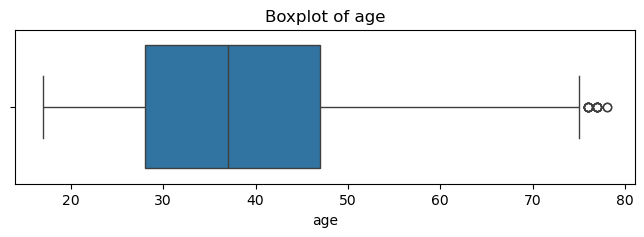

Business Insight: Initial spread and outlier check for age.


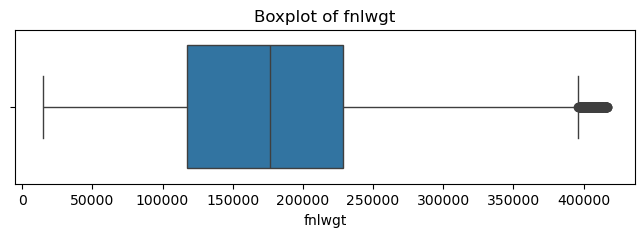

Business Insight: Initial spread and outlier check for fnlwgt.


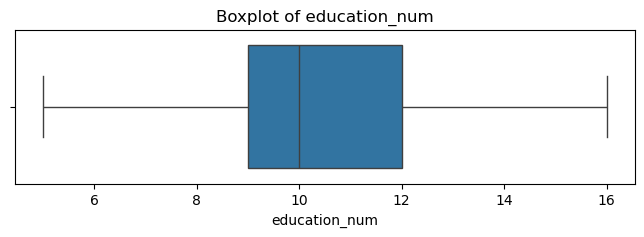

Business Insight: Initial spread and outlier check for education_num.


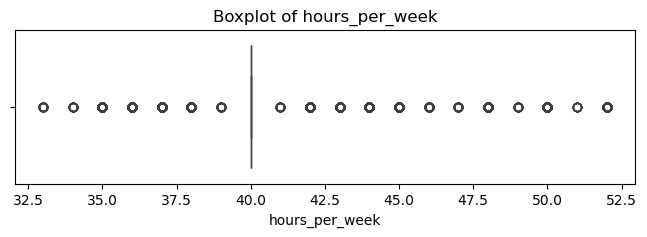

Business Insight: Initial spread and outlier check for hours_per_week.

>>> Box Plots (Categorical vs Numeric)


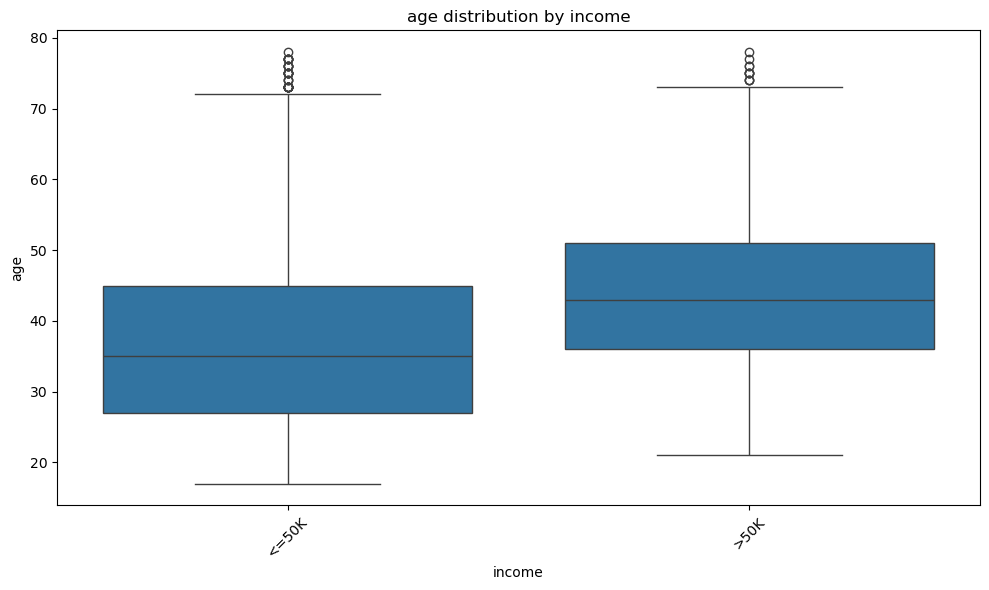

Business Insight: Examines spread/variance in age for each group in income.


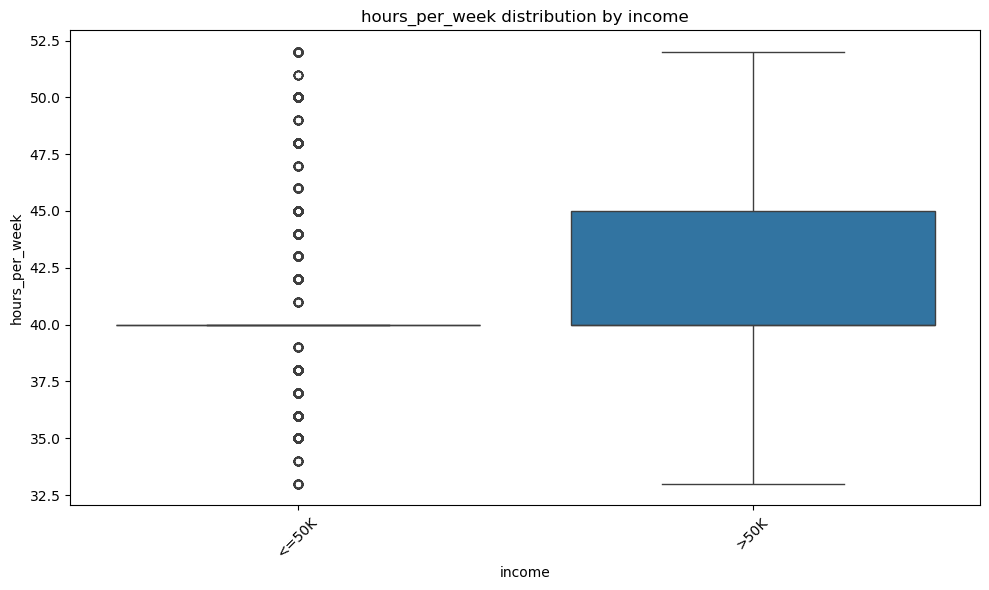

Business Insight: Examines spread/variance in hours_per_week for each group in income.


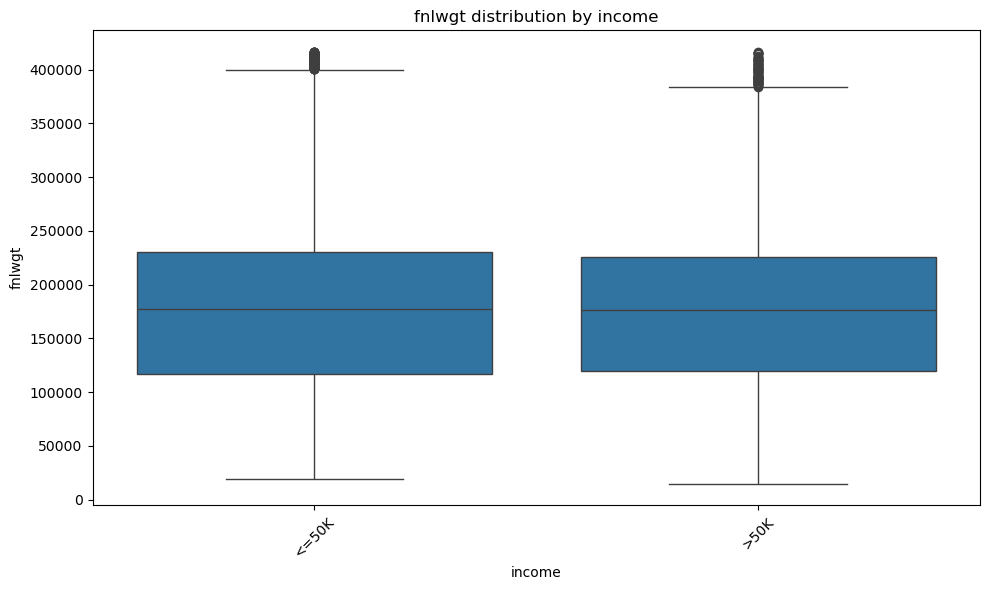

Business Insight: Examines spread/variance in fnlwgt for each group in income.


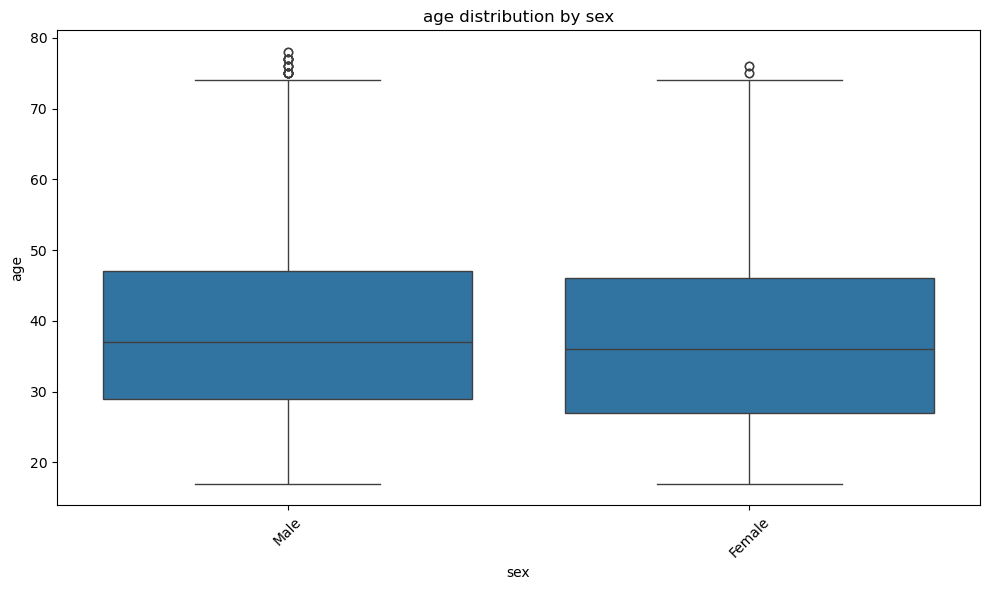

Business Insight: Examines spread/variance in age for each group in sex.


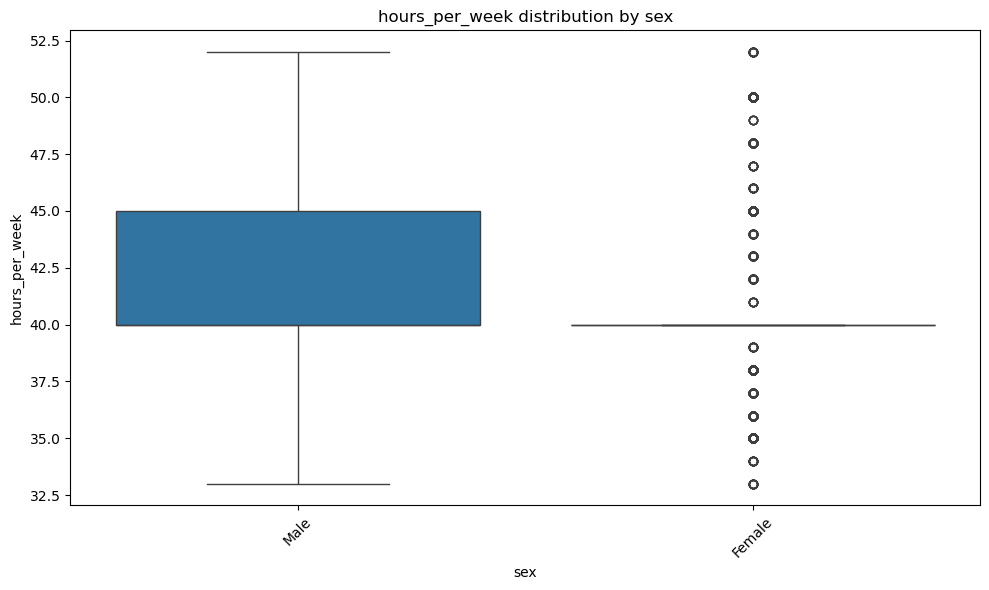

Business Insight: Examines spread/variance in hours_per_week for each group in sex.


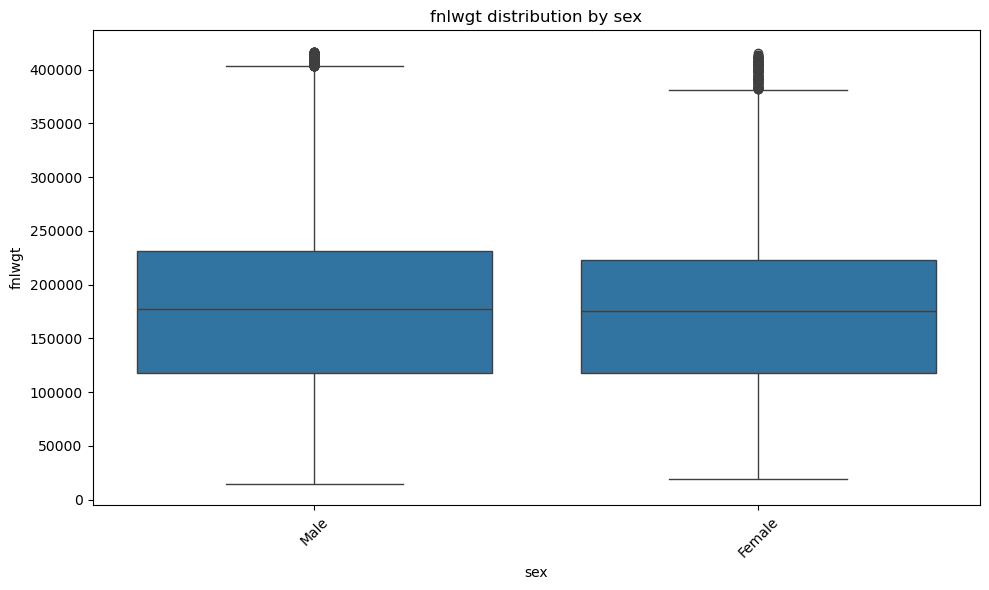

Business Insight: Examines spread/variance in fnlwgt for each group in sex.


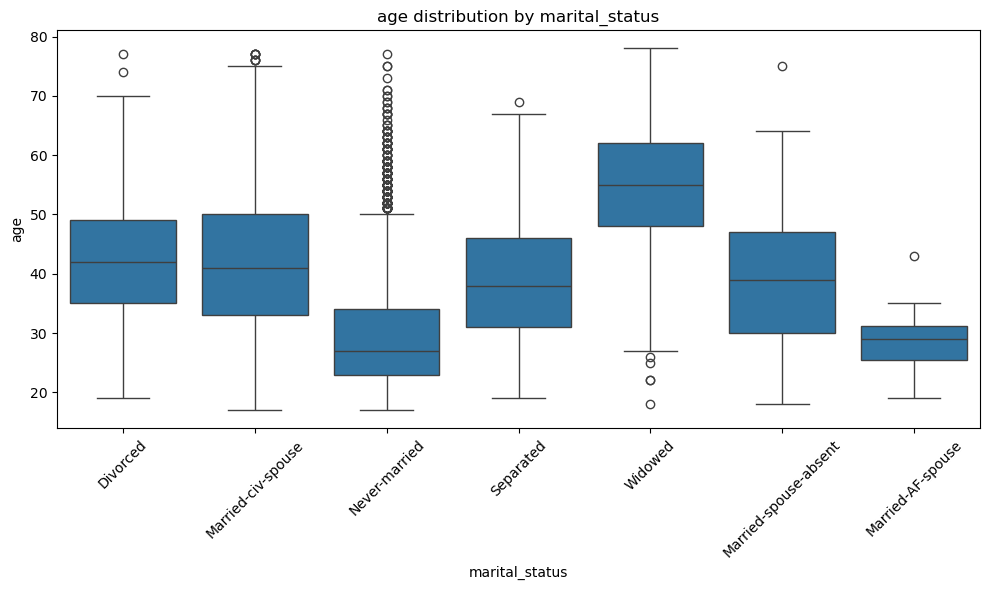

Business Insight: Examines spread/variance in age for each group in marital_status.


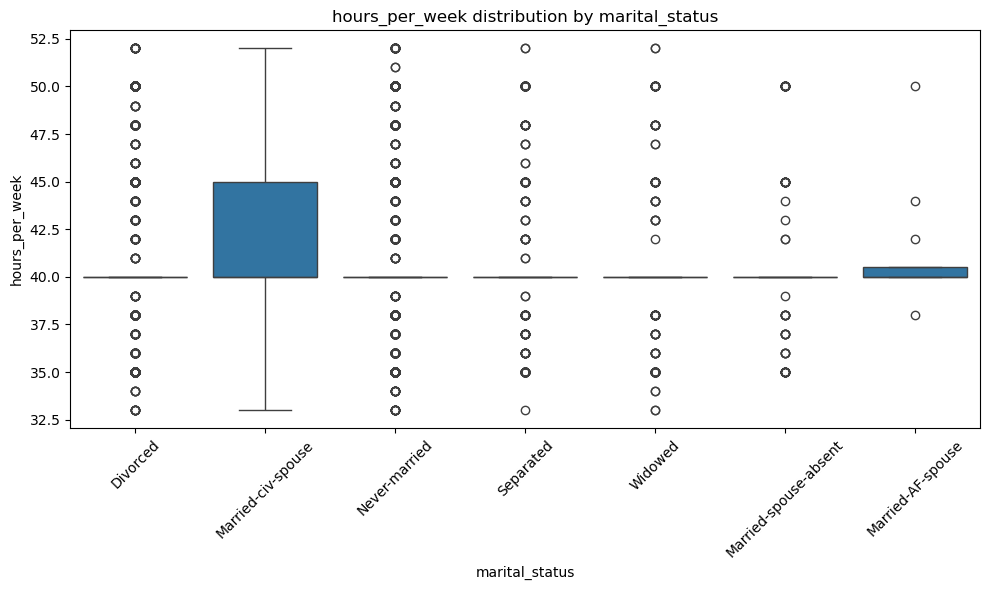

Business Insight: Examines spread/variance in hours_per_week for each group in marital_status.


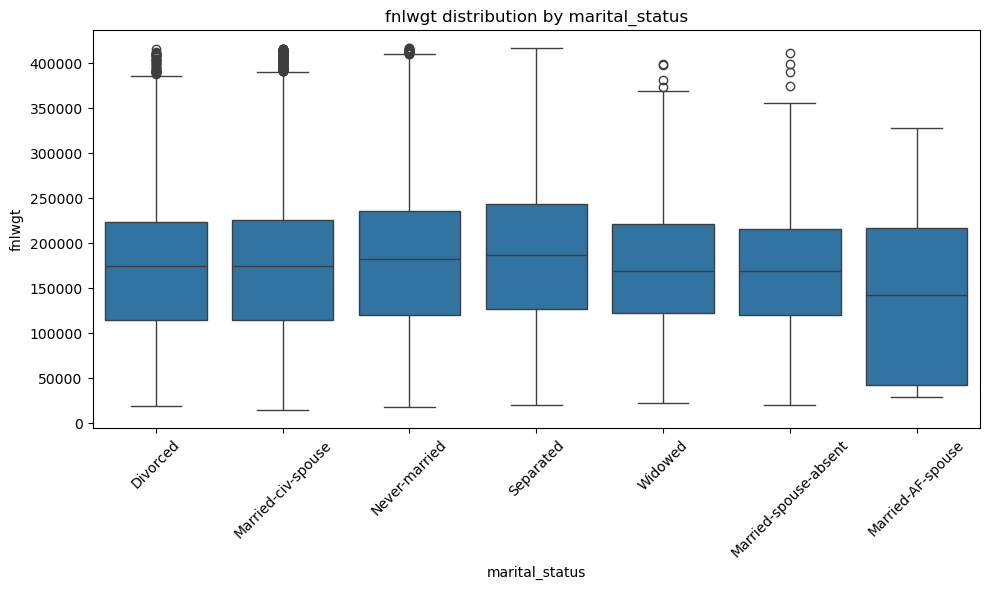

Business Insight: Examines spread/variance in fnlwgt for each group in marital_status.


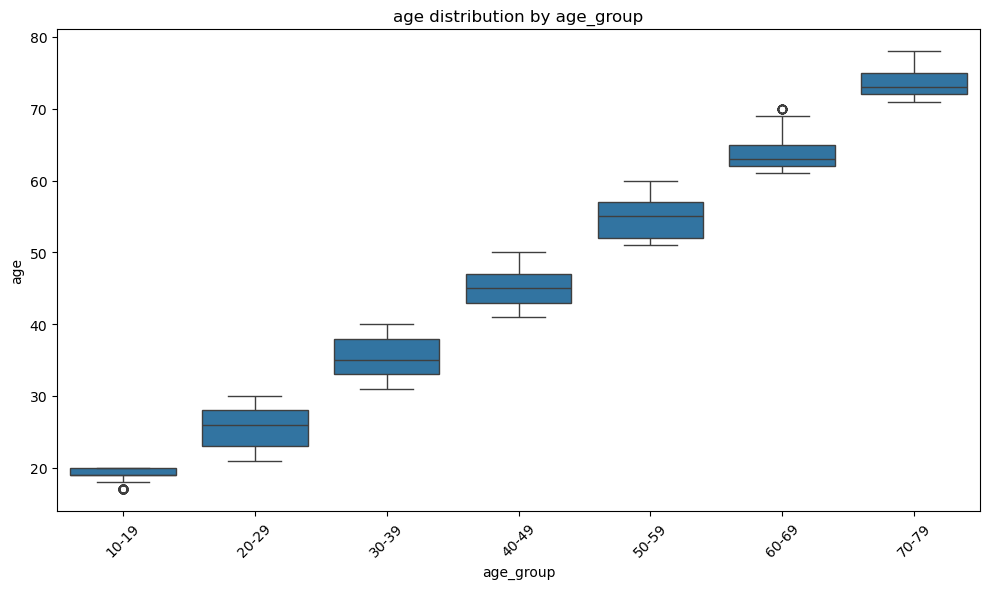

Business Insight: Examines spread/variance in age for each group in age_group.


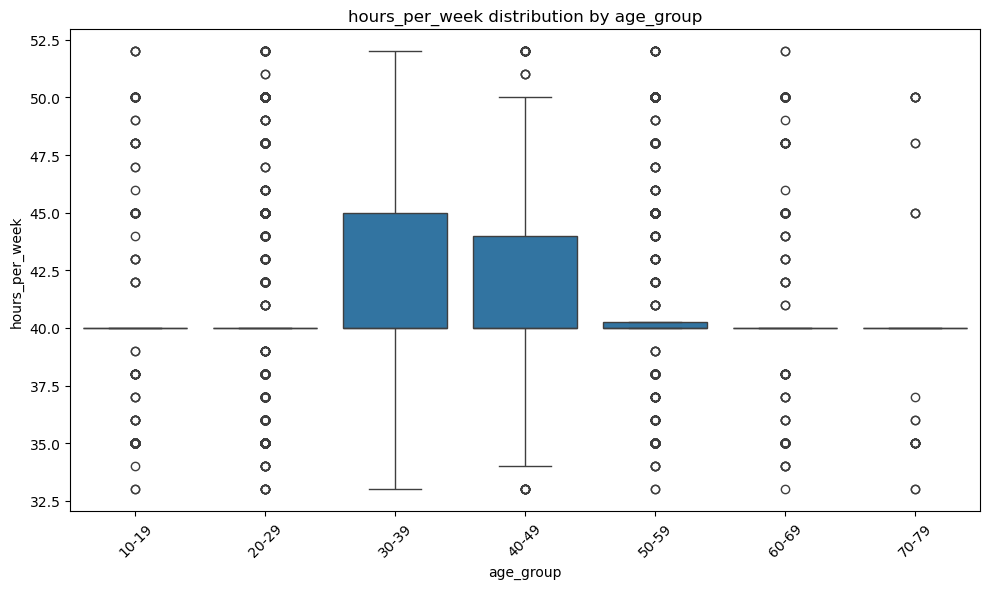

Business Insight: Examines spread/variance in hours_per_week for each group in age_group.


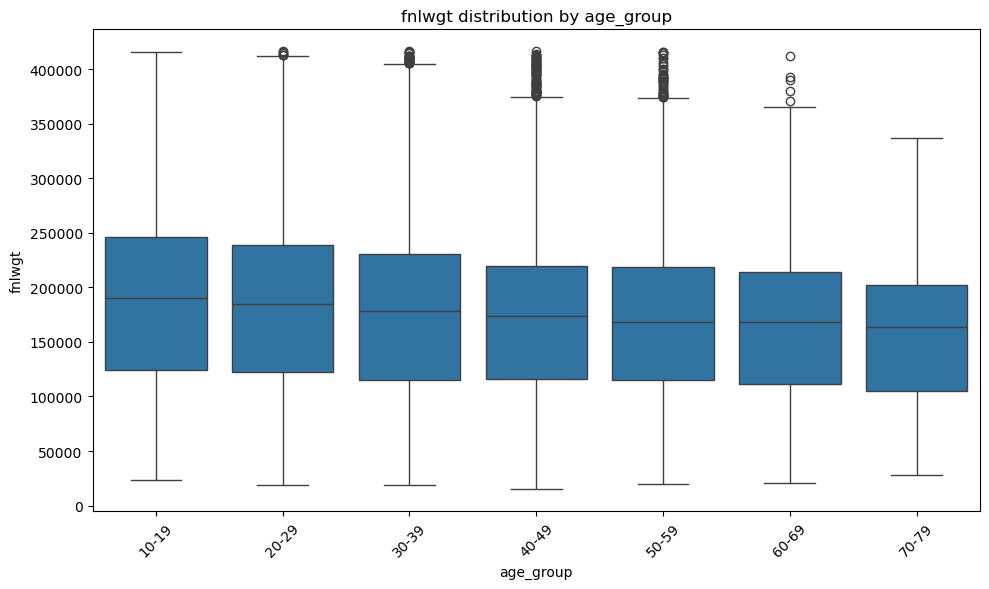

Business Insight: Examines spread/variance in fnlwgt for each group in age_group.

>>> Box Plot (Hours per Week by Workclass)


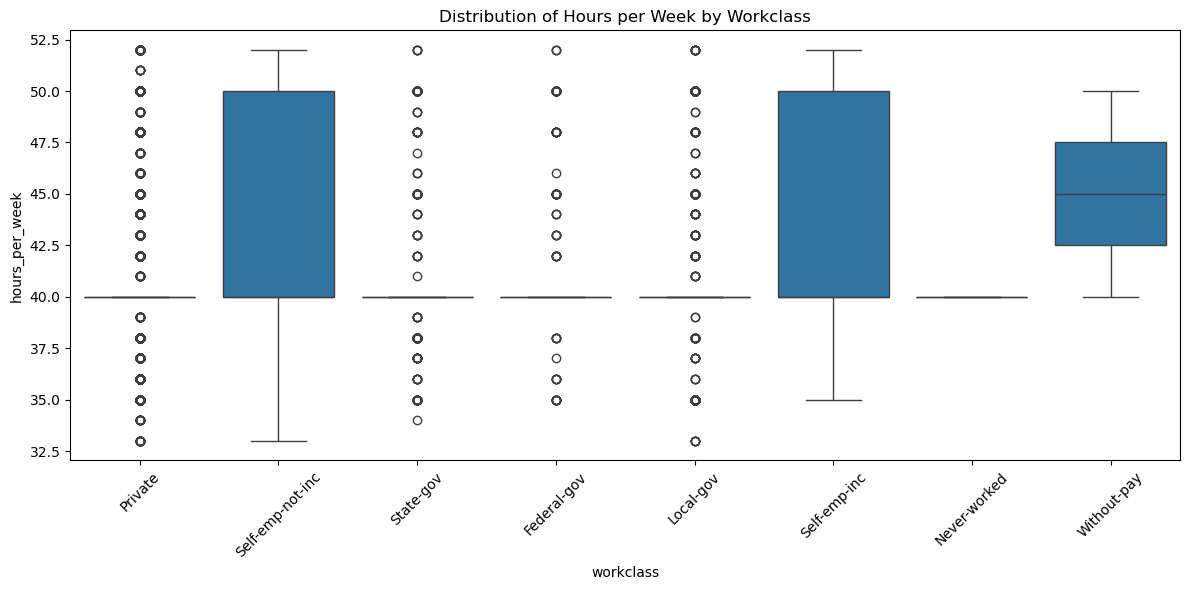

Business Insight: Work hour differences for work types, informs productivity insights.

>>> Histograms (hue=Income)


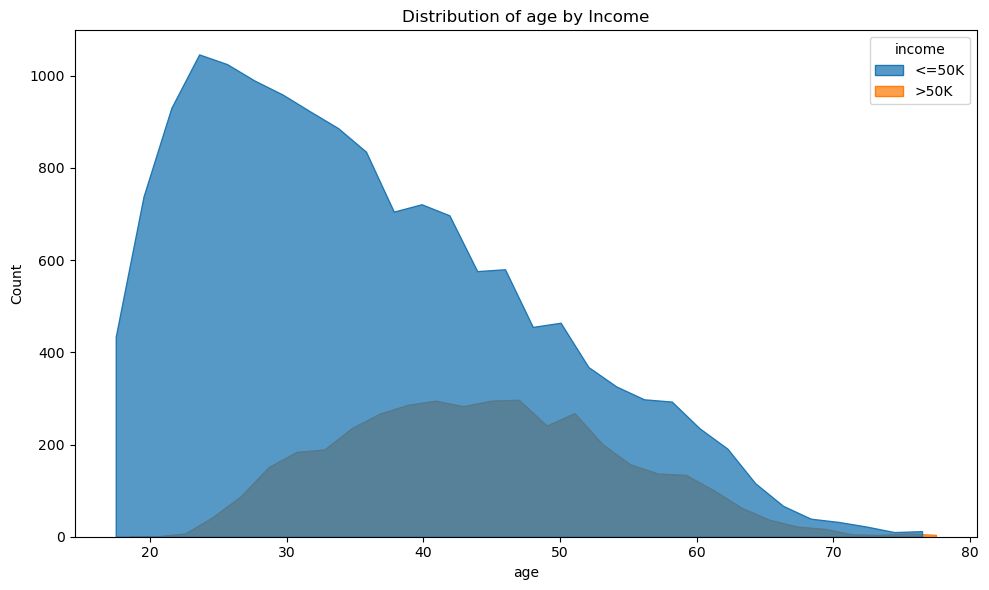

Business Insight: Shows split of age values across income levels.


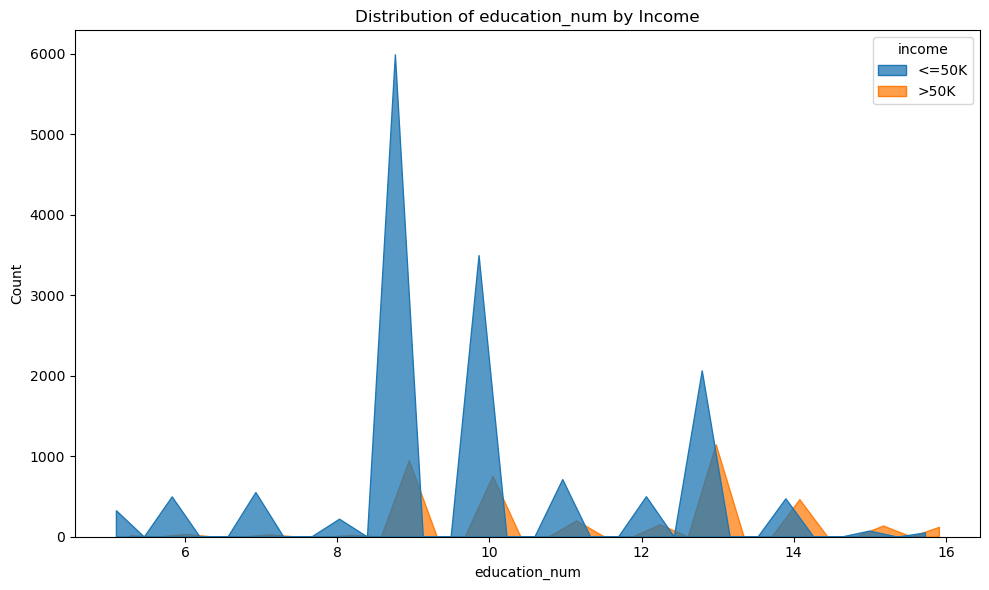

Business Insight: Shows split of education_num values across income levels.


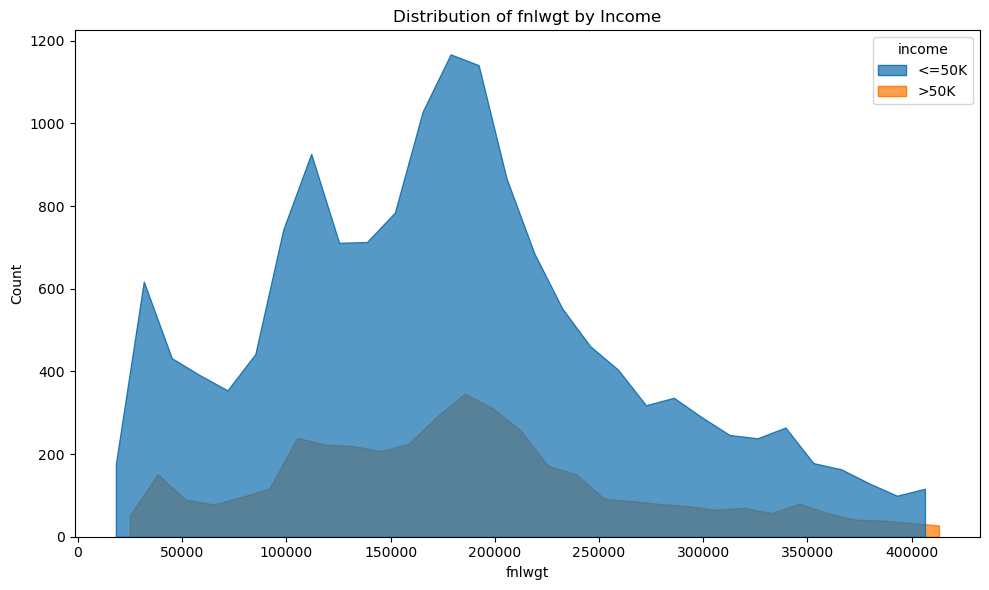

Business Insight: Shows split of fnlwgt values across income levels.


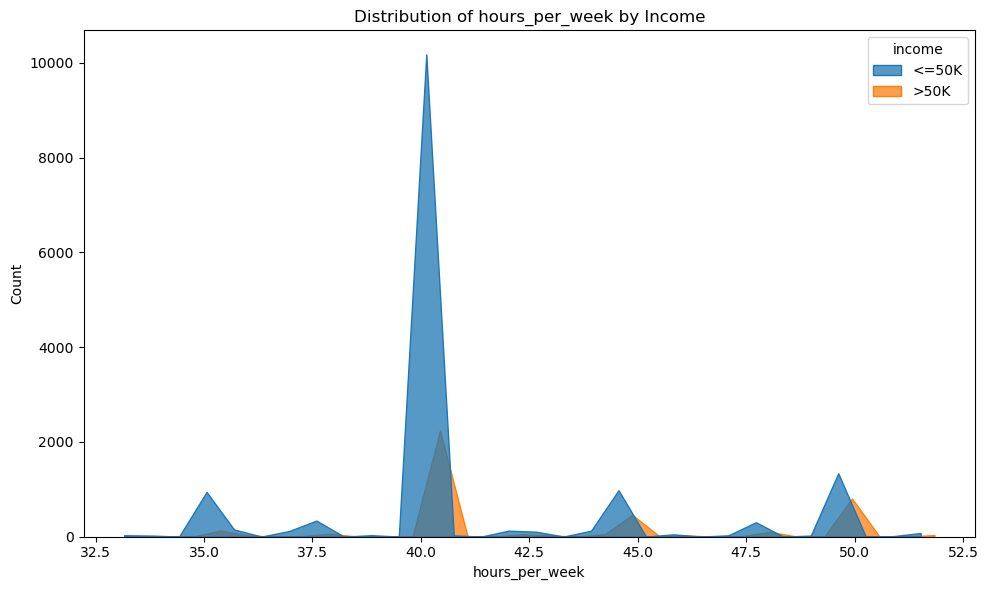

Business Insight: Shows split of hours_per_week values across income levels.

>>> Histograms (hue=Sex)


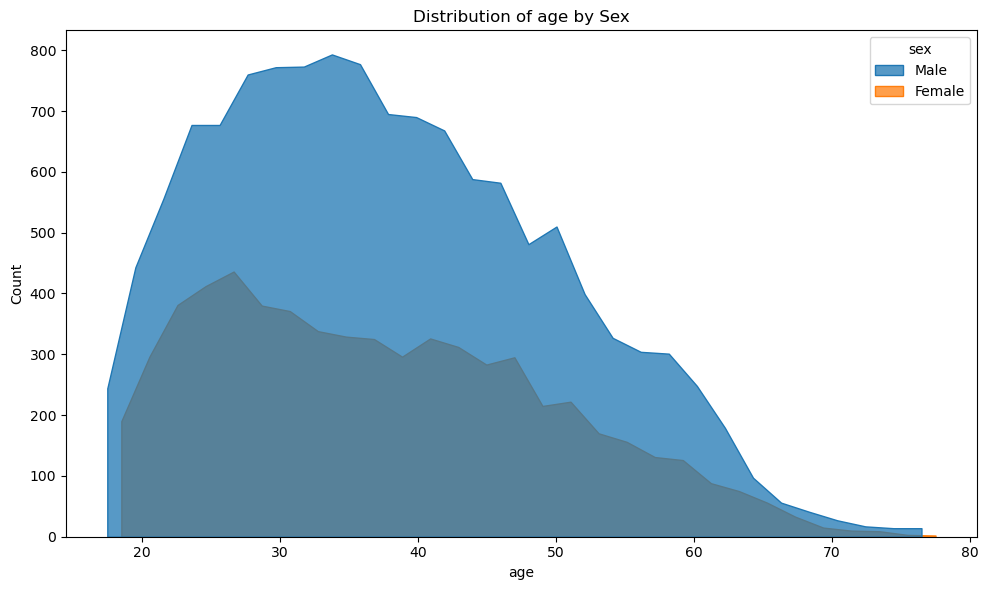

Business Insight: Reveals gender-dependent distributions for age.


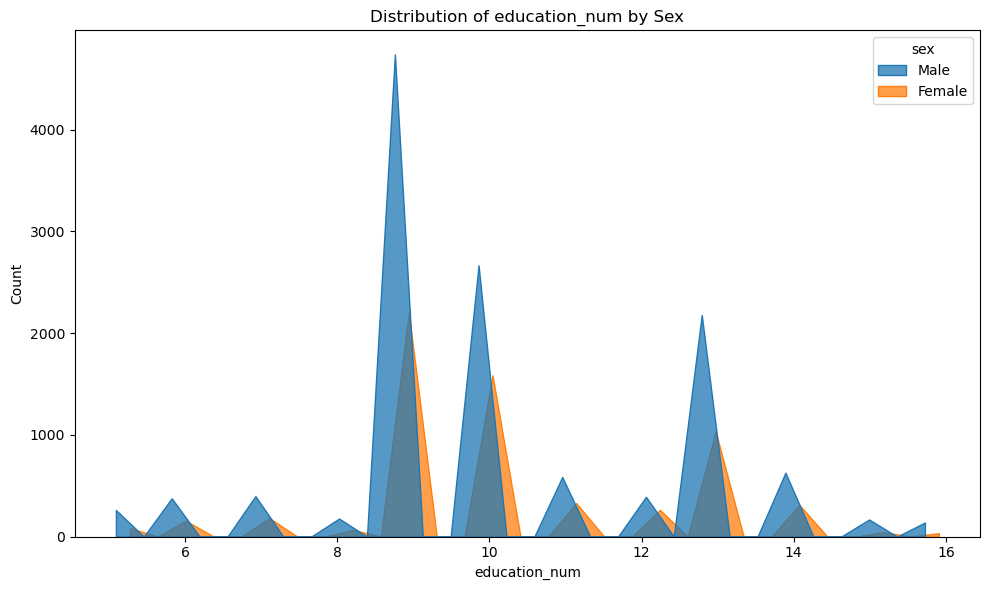

Business Insight: Reveals gender-dependent distributions for education_num.


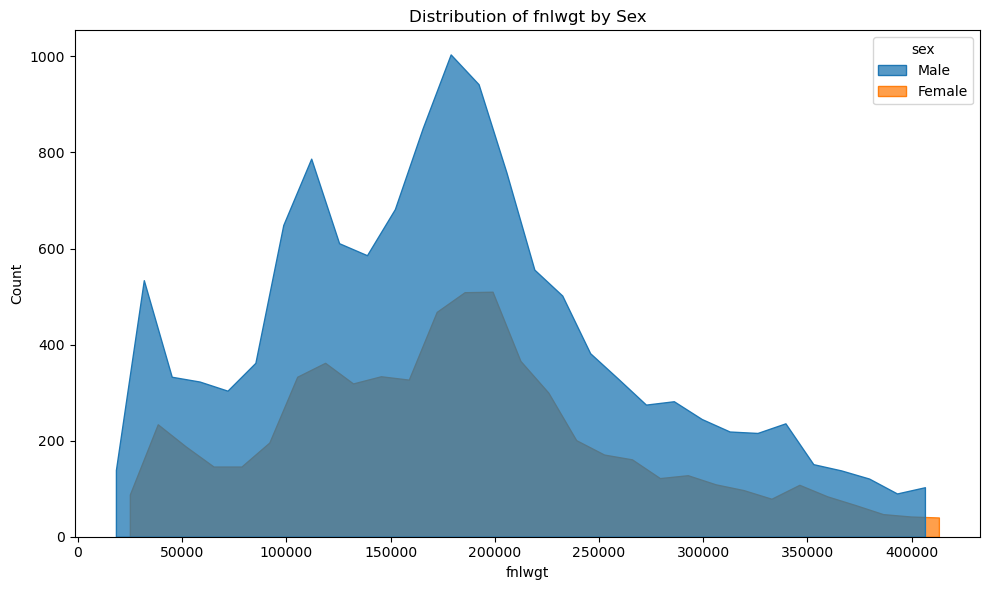

Business Insight: Reveals gender-dependent distributions for fnlwgt.


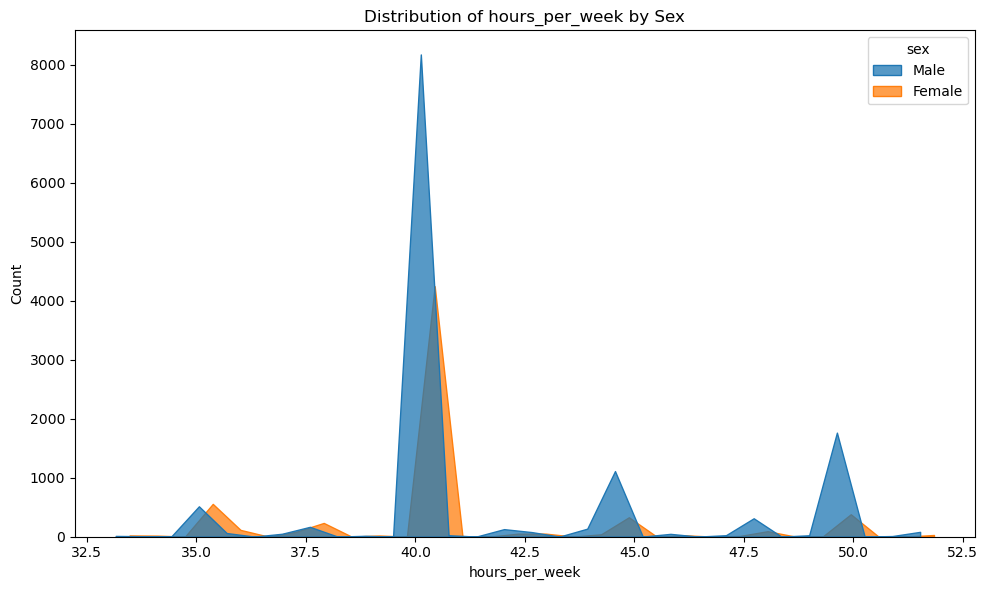

Business Insight: Reveals gender-dependent distributions for hours_per_week.

>>> Stacked Bar Plots (Income as Hue)


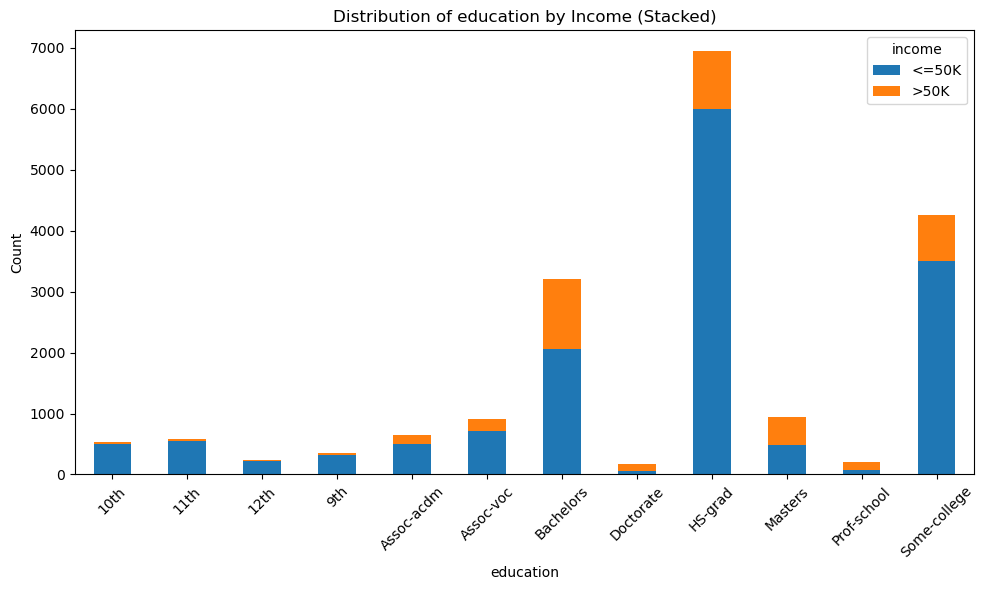

Business Insight: Stacked bar shows how different categories break down across income.


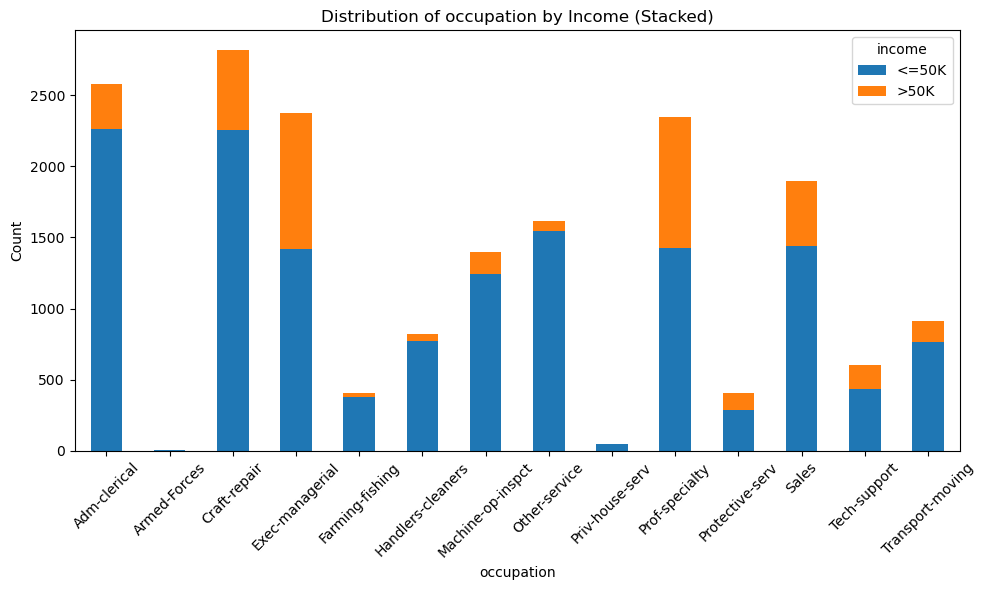

Business Insight: Stacked bar shows how different categories break down across income.


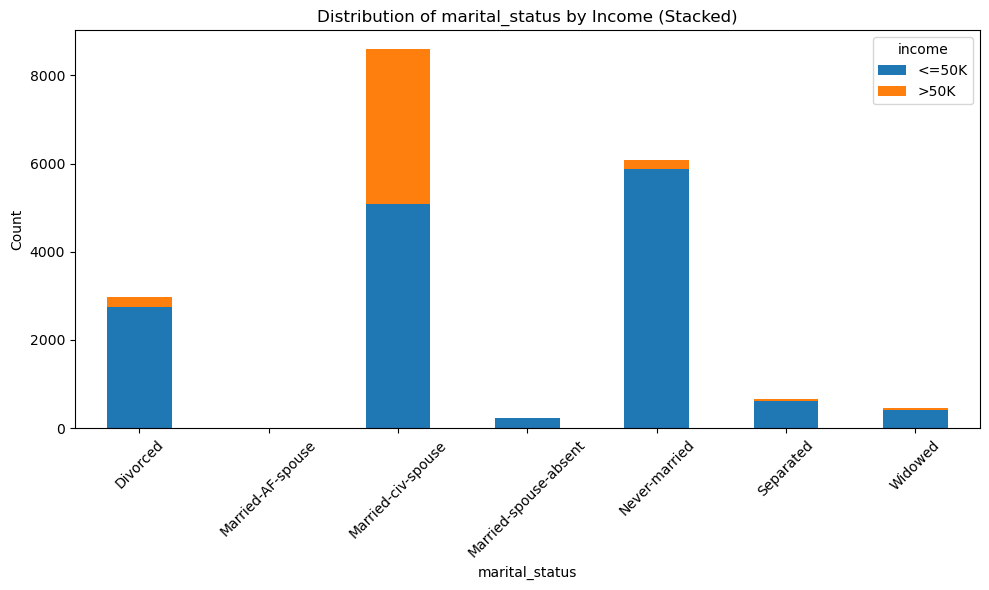

Business Insight: Stacked bar shows how different categories break down across income.


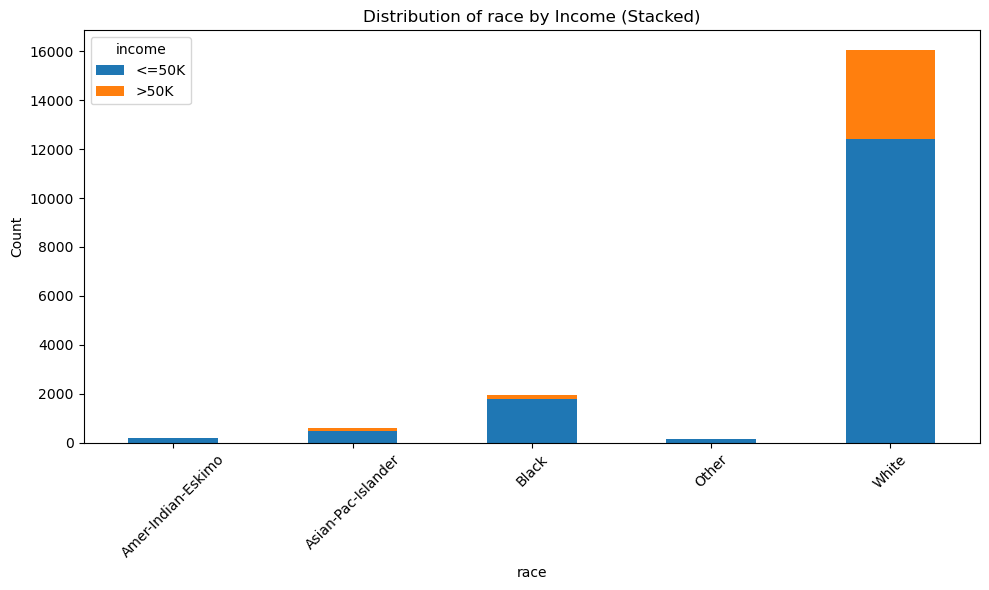

Business Insight: Stacked bar shows how different categories break down across income.

>>> Violin Plot (hours_per_week by education)


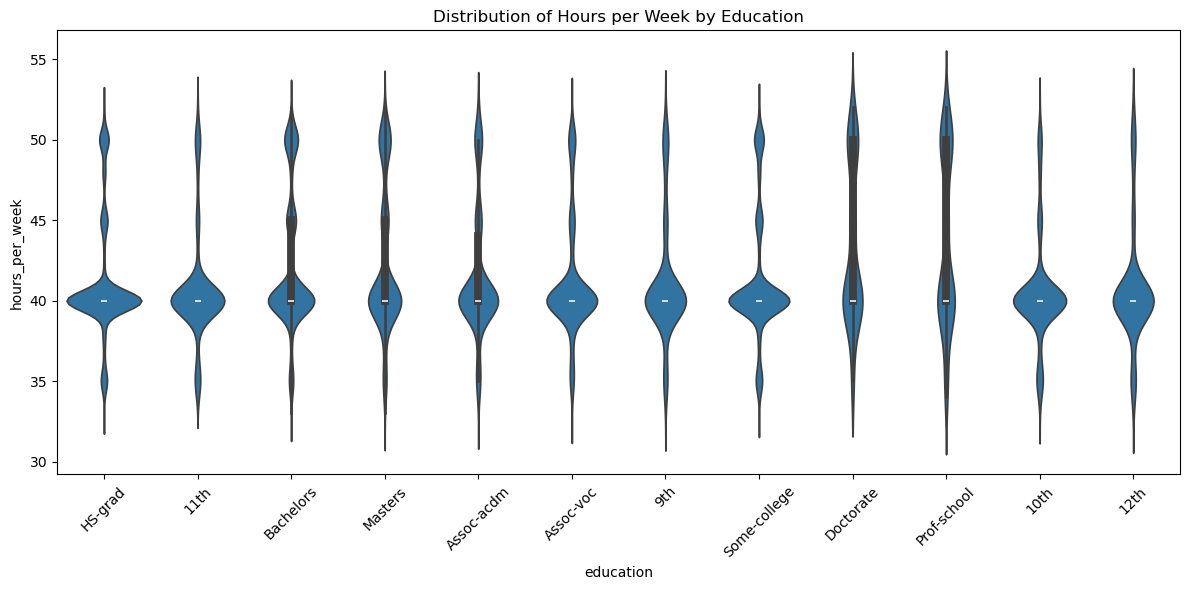

Business Insight: Reveals work hour diversity within education groups.

>>> Stacked Bar (Sex by Workclass)


<Figure size 1000x600 with 0 Axes>

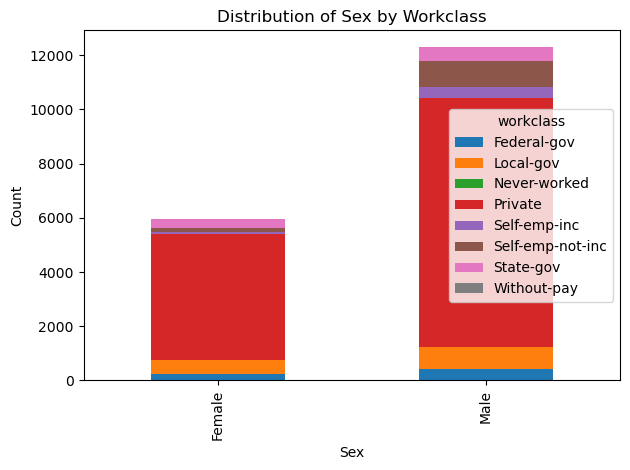

Business Insight: Shows how men and women are distributed among work classes.

>>> Scatter Plots (hours_per_week/fnlwgt vs education_num/age; hue=income & sex)


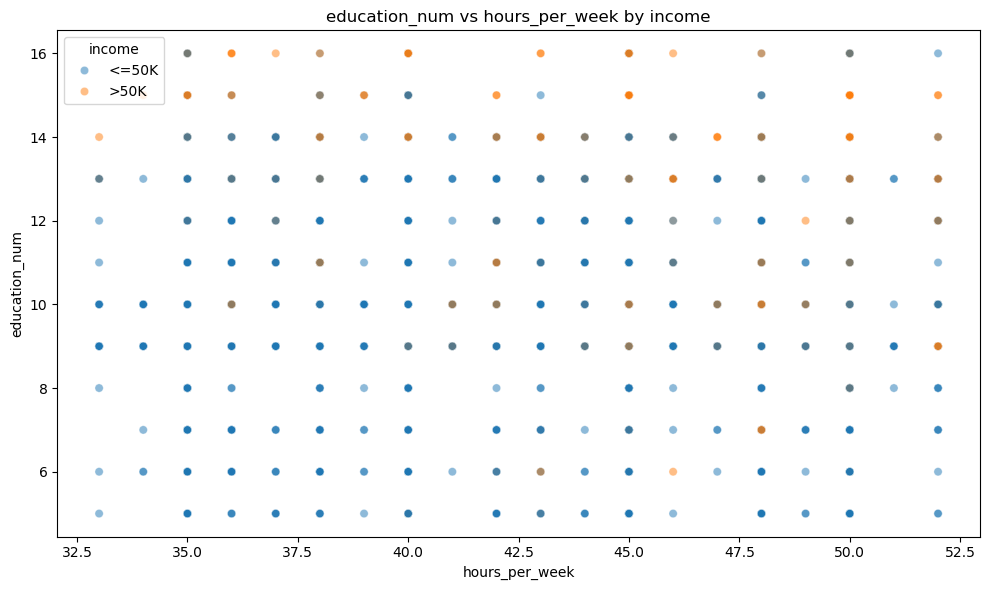

Business Insight: education_num vs hours_per_week patterns colored by income; key for multidimensional feature analysis.


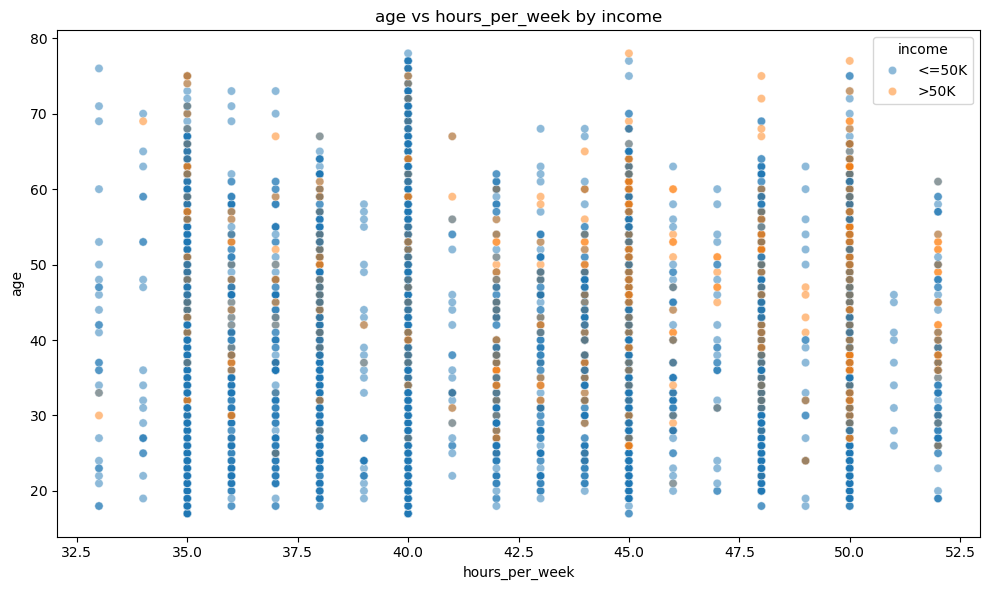

Business Insight: age vs hours_per_week patterns colored by income; key for multidimensional feature analysis.


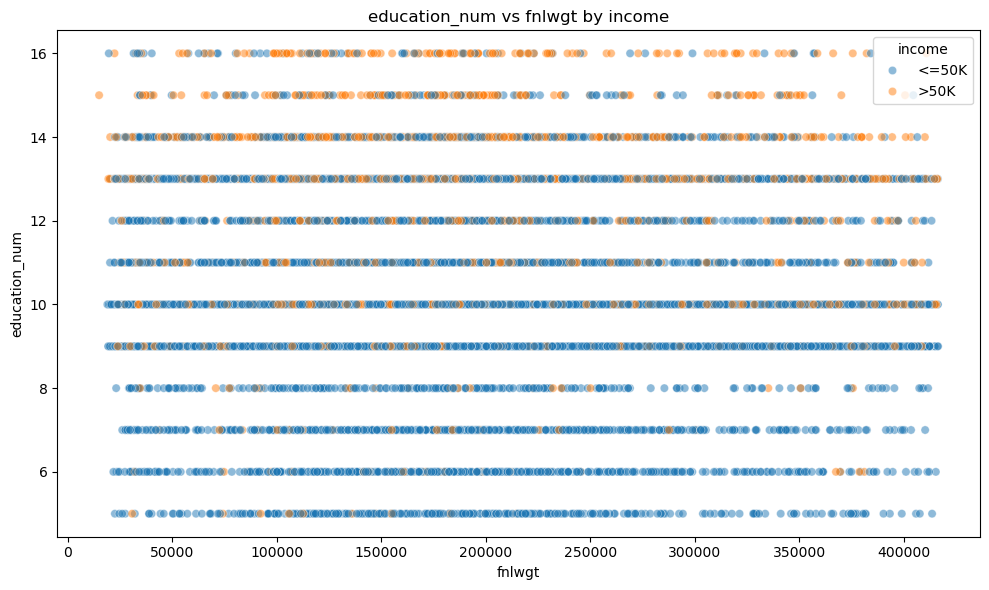

Business Insight: education_num vs fnlwgt patterns colored by income; key for multidimensional feature analysis.


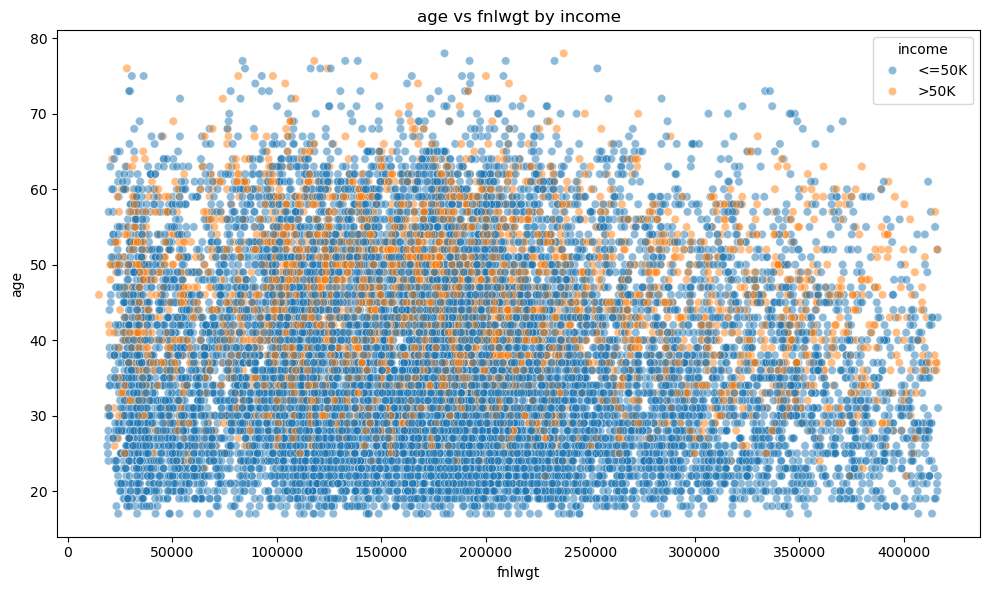

Business Insight: age vs fnlwgt patterns colored by income; key for multidimensional feature analysis.


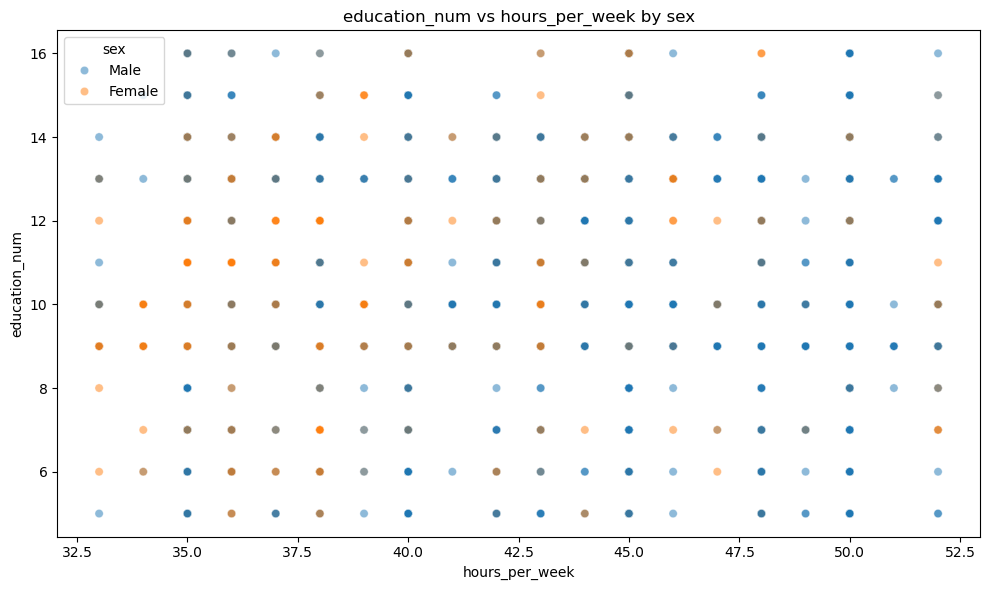

Business Insight: education_num vs hours_per_week patterns colored by sex; key for multidimensional feature analysis.


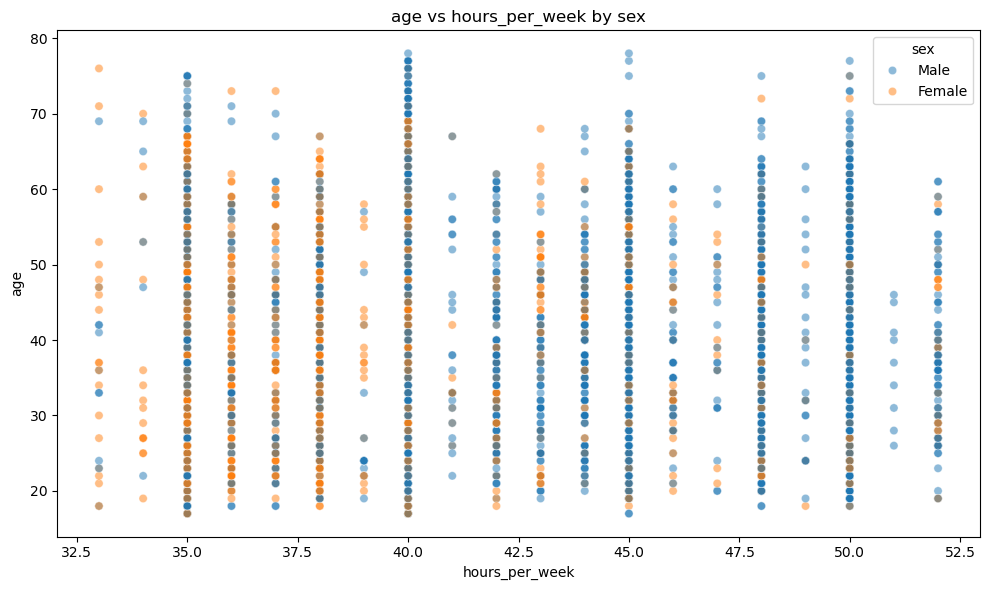

Business Insight: age vs hours_per_week patterns colored by sex; key for multidimensional feature analysis.


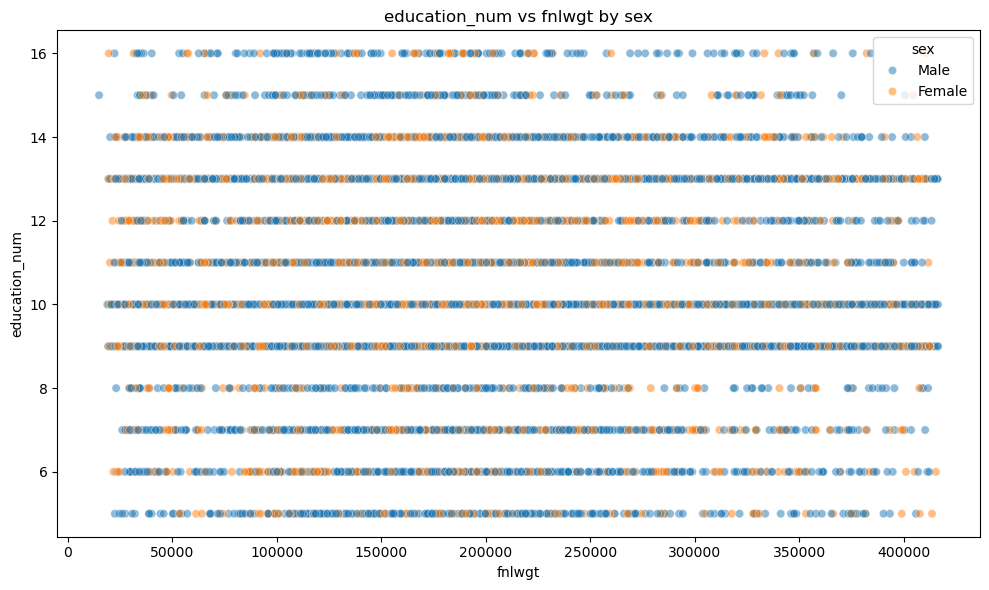

Business Insight: education_num vs fnlwgt patterns colored by sex; key for multidimensional feature analysis.


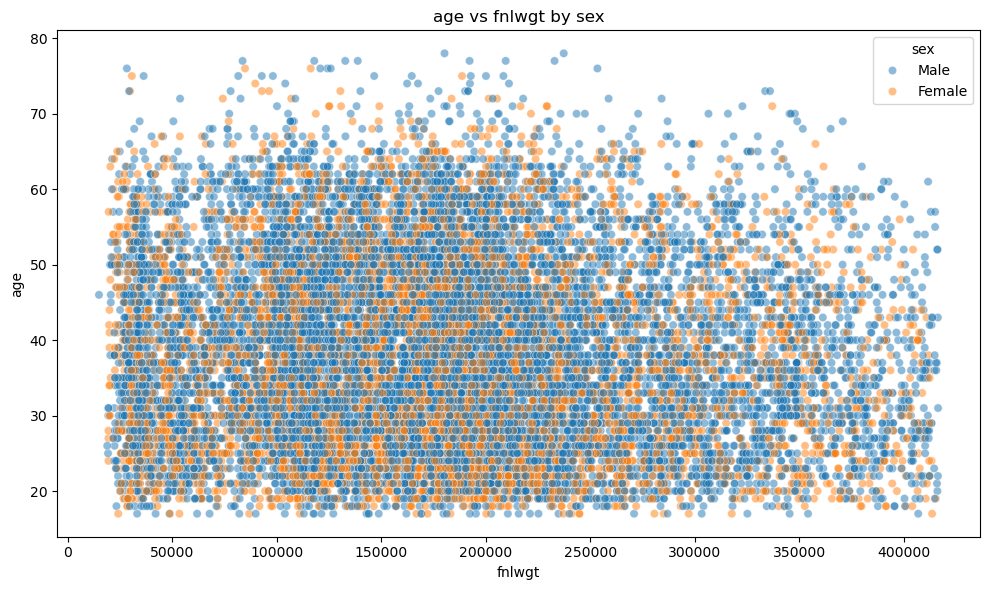

Business Insight: age vs fnlwgt patterns colored by sex; key for multidimensional feature analysis.

>>> Pairplots (Numeric columns, hue=income & sex)


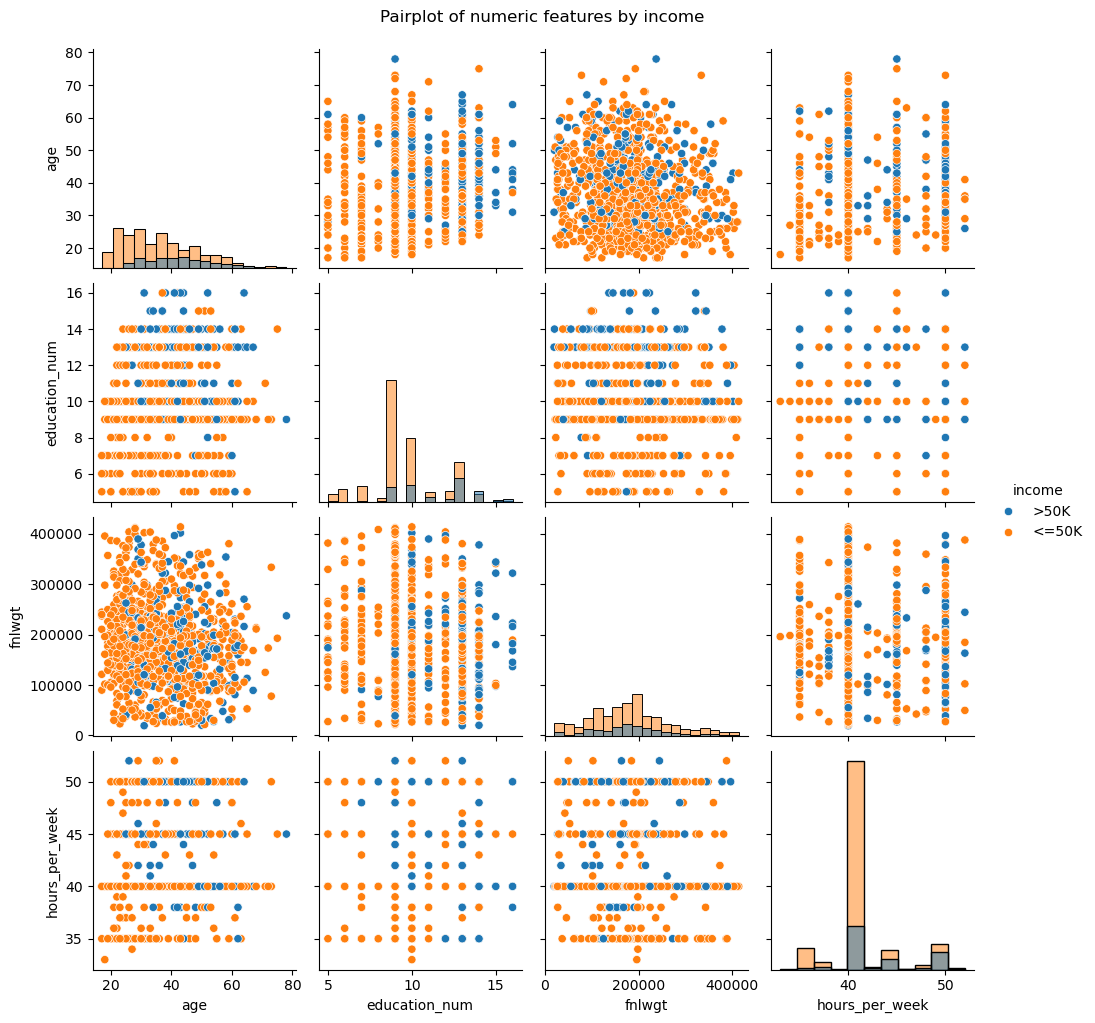

Business Insight: Pairplot helps identify interplay between features and income.


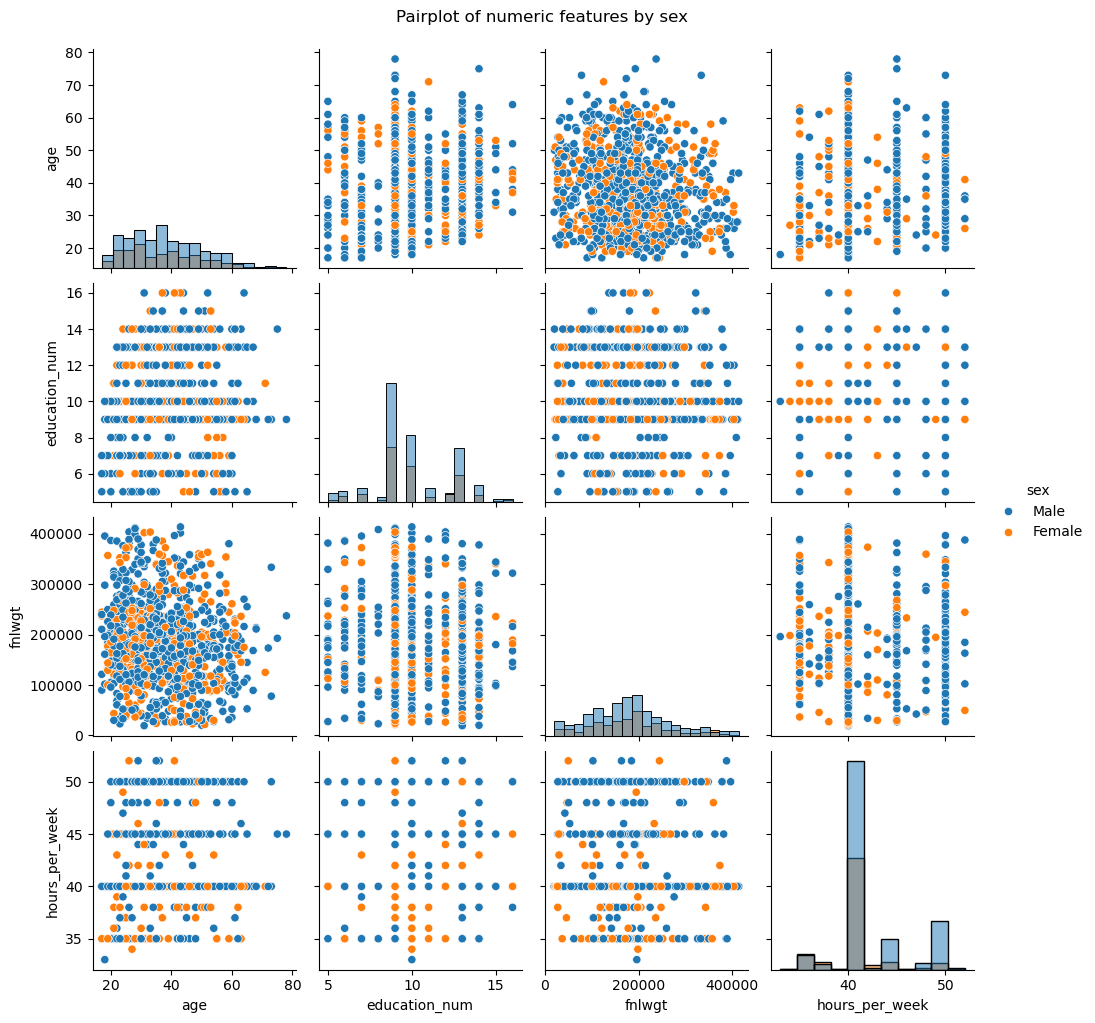

Business Insight: Pairplot helps identify interplay between features and sex.

>>> Heatmap (Avg Hours Worked by Age Group & Age)


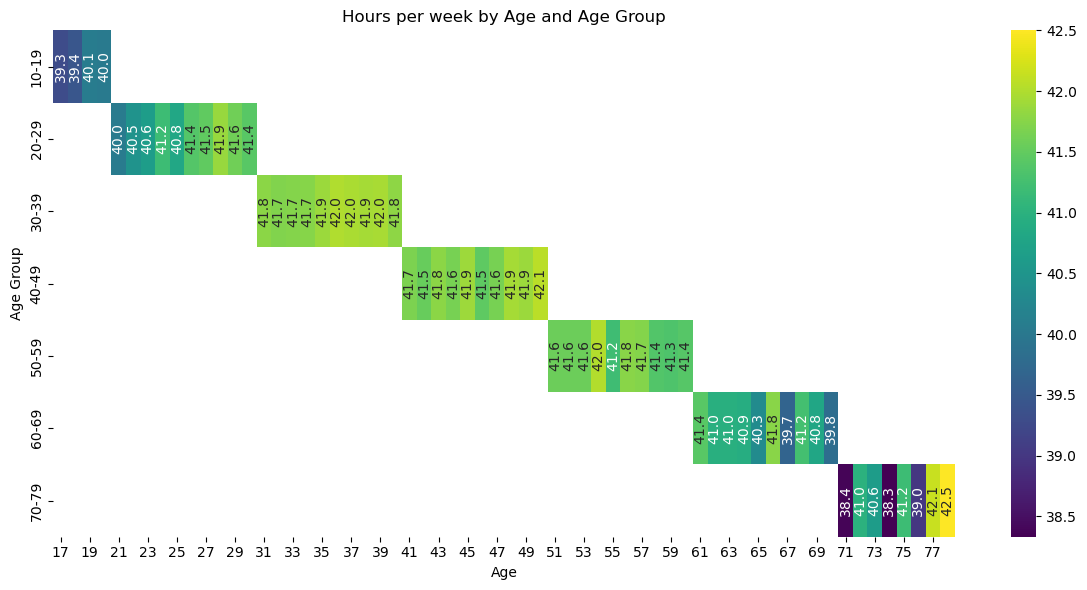

Business Insight: Reveals age-related work hour trends, critical for workforce/career planning.

Business Summary: This analysis illustrates significant relationships between demographic factors and income distribution, highlighting age, education, occupation, and work hours as key predictors. Gender and occupation also show workforce trends with implications for business policy and HR.
Cleaned data saved as ../data/cleaned_data.csv


In [2]:
# Import custom data cleaning and EDA functions from your script
from eda_pipeline import load_and_clean_data, comprehensive_eda

# Set the path to the raw data file (use relative paths for portability across systems and repo structure)
filepath = '../data/raw.csv'  # use relative paths for portability

# Load and clean the raw data using your pipeline function
df = load_and_clean_data(filepath)

# Perform comprehensive exploratory data analysis on the cleaned dataframe
comprehensive_eda(df)

# Save the cleaned dataframe to a CSV file for further analysis and reproducibility
df.to_csv('../data/cleaned_data.csv', index=False)
print("Cleaned data saved as ../data/cleaned_data.csv")


In [3]:
# Import the hypothesis testing function from your custom script
from hypothesis_testing import run_hypothesis_tests

# Run hypothesis tests (e.g., chi-square, t-test) on the cleaned dataframe
# This will output statistical results and interpretation for key variable relationships
run_hypothesis_tests(df)



HYPOTHESIS TESTING

Test 1: Is there an association between gender and income group?
Contingency Table:
 income  <=50K  >50K
sex                
Female   5693   588
Male     9278  3432
Chi2 statistic: 782.881, p-value: 0.0000
Result: Reject H0. Significant association between gender and income group.

Test 2: Do Bachelors degree holders work more hours per week than HS graduates?
t-statistic: 12.248, p-value: 0.0000
Mean hours - Bachelors: 42.25, HS-grad: 41.17
Result: Reject H0. Significant difference in hours between education levels.



In [4]:
# Load the final trained machine learning model (e.g., best pipeline from earlier SVM tuning)
# The model is saved as a .joblib file in the main project folder for easy reuse across analysis steps
model = joblib.load('../main/svm_best_pipeline.joblib')



PREDICTIVE VISUALIZATION

1. Distribution of Predicted Income
Saved: plots\01_distribution_predicted_income.png


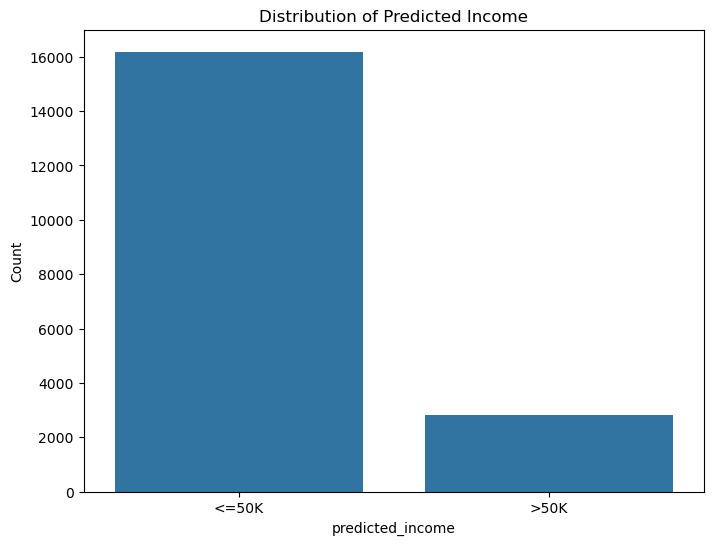

Business Insight: The predicted income distribution shows most people are in the <=50K group, reflecting the model's conservative approach and the original data's class imbalance.

2. Actual vs Predicted Income Comparison
Saved: plots\02_actual_vs_predicted_income.png


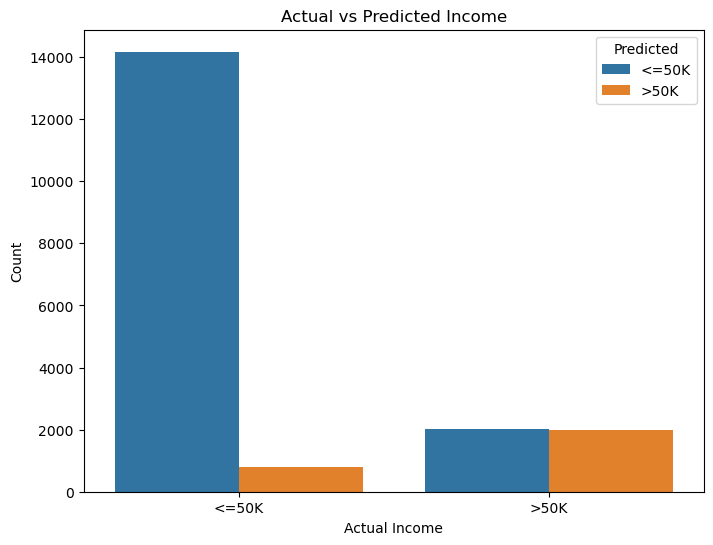

Business Insight: Comparison reveals the model's tendency to under-predict high-income individuals, suggesting opportunities for improving recall on the >50K class through model tuning or cost-sensitive learning.

3. Confusion Matrix
Saved: plots\03_confusion_matrix.png


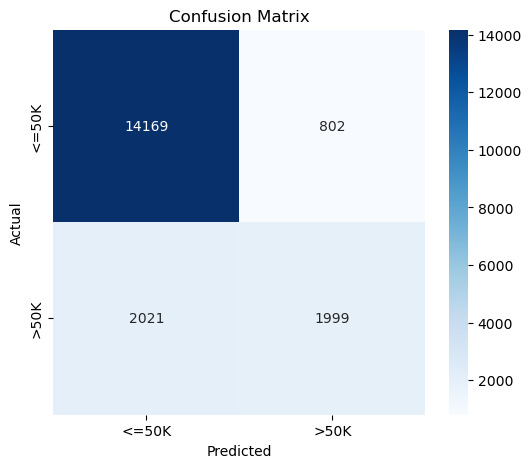

Business Insight: Model accuracy is high for <=50K, but lower for >50K; this may be due to class imbalance. The high precision for <=50K predictions makes this model suitable for conservative income classification tasks.

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     14971
        >50K       0.71      0.50      0.59      4020

    accuracy                           0.85     18991
   macro avg       0.79      0.72      0.75     18991
weighted avg       0.84      0.85      0.84     18991

Business Insight: Classification metrics show strong overall performance with room for improvement in high-income prediction recall, which could be addressed through threshold adjustment or ensemble methods.

4. Predicted Income by Education Level
Saved: plots\04_predicted_income_by_education.png


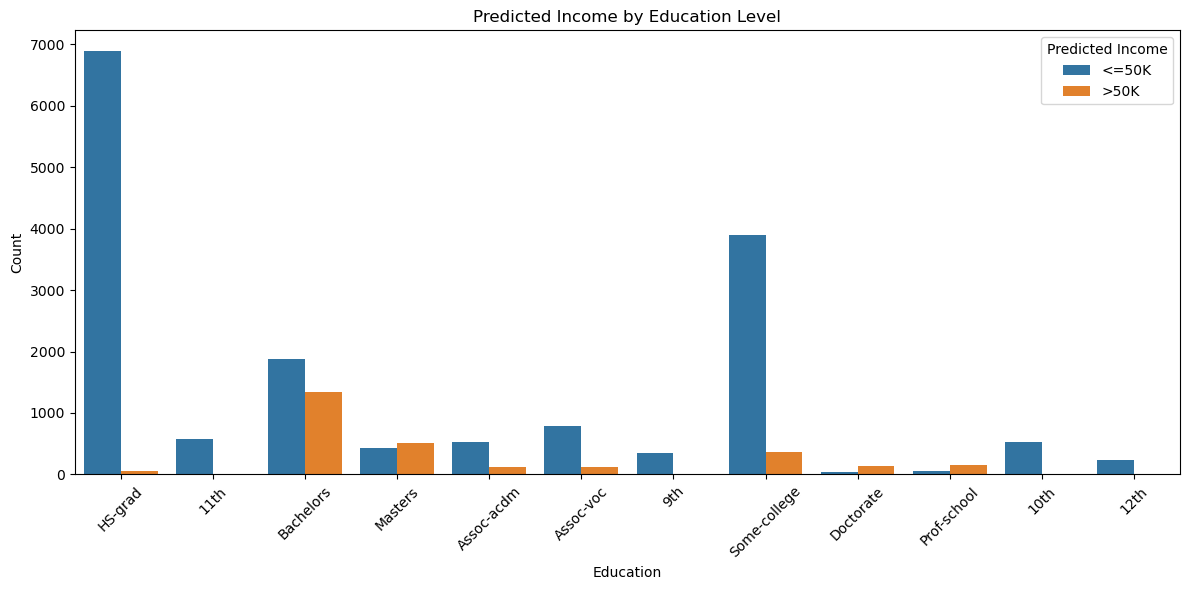

Business Insight: Model correctly identifies education as a strong income predictor, with higher education levels showing increased >50K predictions. This validates education investment strategies and targeted recruitment policies.

5. Predicted Income by Age Group
Saved: plots\05_predicted_income_by_age_group.png


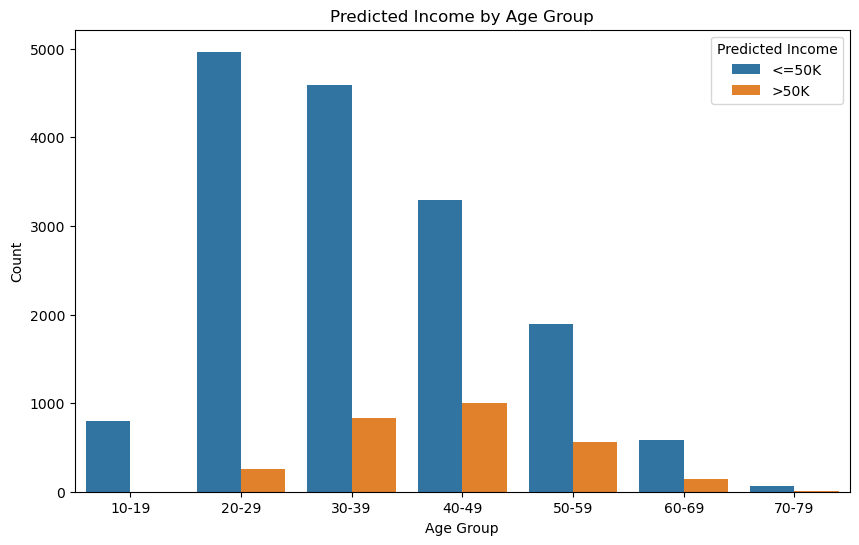

Business Insight: Age-based predictions show peak earning predictions in middle-age groups (40-59), aligning with typical career progression patterns and informing retirement planning and workforce development strategies.

6. Age vs Hours per Week (Colored by Predicted Income)
Saved: plots\06_age_vs_hours_by_predicted_income.png


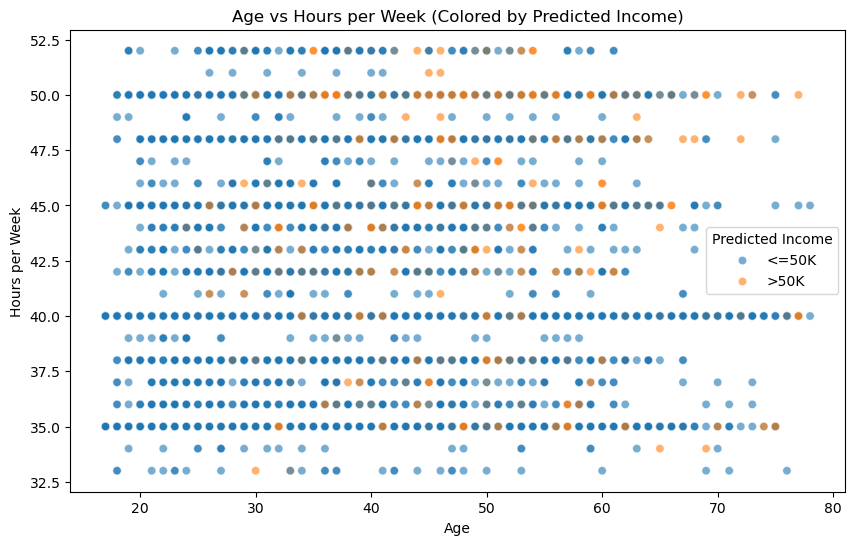

Business Insight: Scatter plot reveals that higher predicted incomes correlate with longer work hours across all age groups, suggesting work intensity as a key factor in earning potential and work-life balance considerations.

7. Predicted Income by Occupation
Saved: plots\07_predicted_income_by_occupation.png


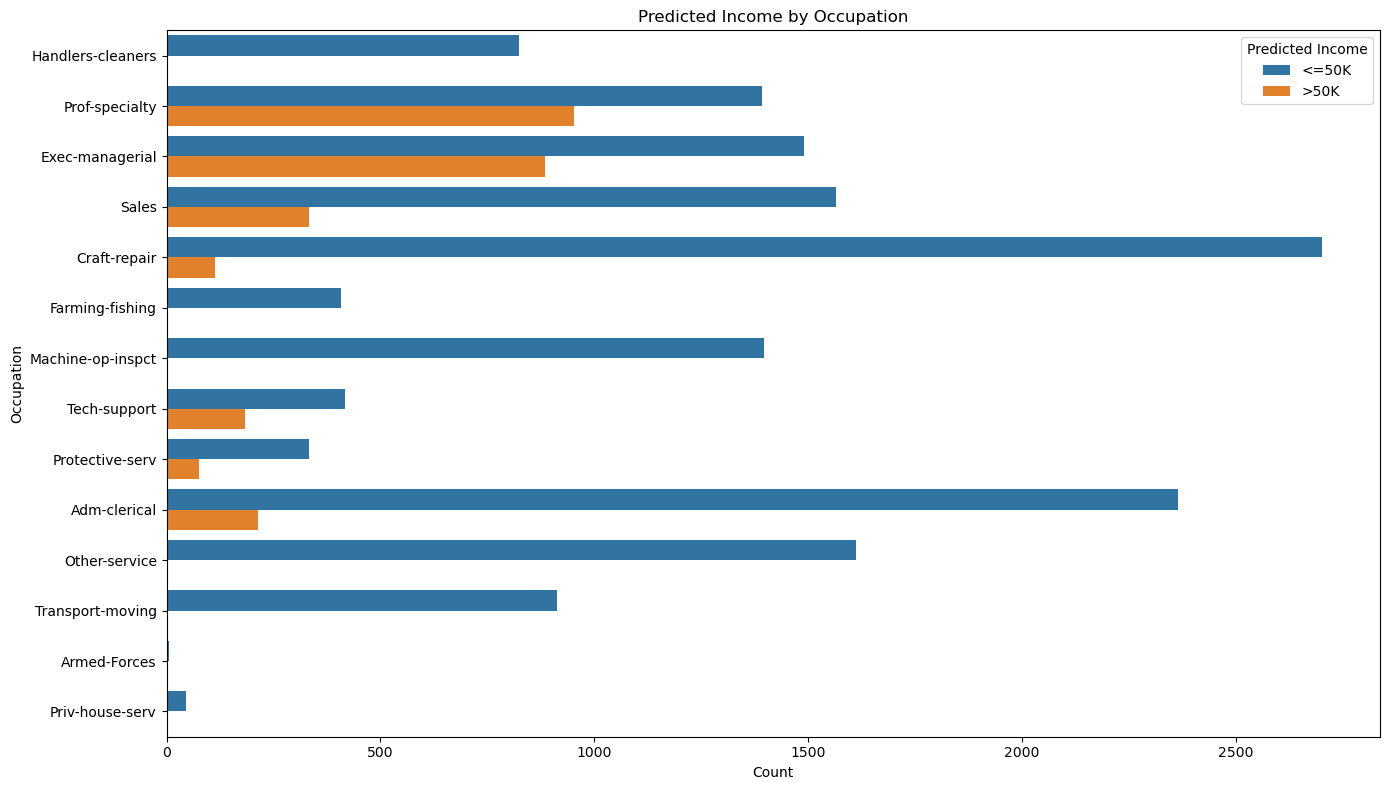

Business Insight: Occupation-based predictions clearly distinguish high-earning professions (executives, professionals) from service roles, providing valuable insights for career counseling and salary benchmarking initiatives.

8. Hours per Week Distribution by Predicted Income
Saved: plots\08_boxplot_hours_by_predicted_income.png


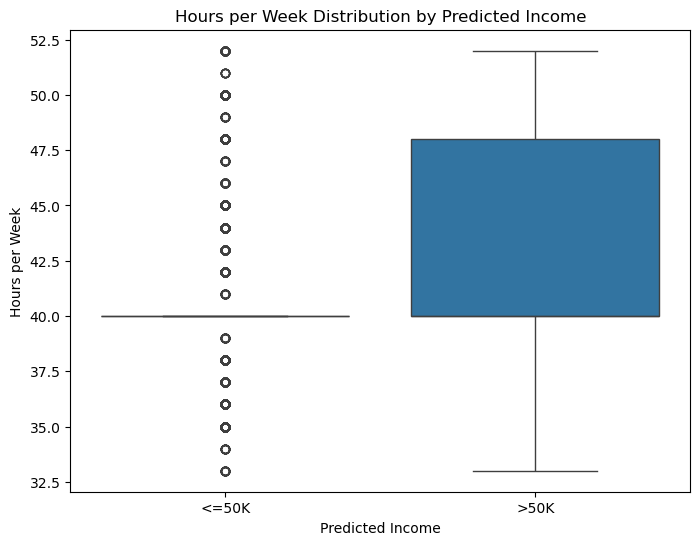

Business Insight: Box plot confirms that predicted high earners work significantly more hours on average, with greater variability, indicating the importance of work commitment in income prediction and potential burnout risk management.

All predictive visualizations saved in 'plots'.


In [5]:

# Import custom functions for model predictions and visualizations from your visualization script
from predictive_visualization import make_predictions, create_predictive_visualizations

# Use the trained model to make predictions on the cleaned dataframe;
# this function adds a new column with predicted income classes
df_clean = make_predictions(model, df)

# Generate a set of visualizations (distribution, confusion matrix, feature plots, etc.)
# to interpret and communicate the model's predictions and insights
create_predictive_visualizations(df_clean)


In [ ]:
# Save the dataframe with predictions (and all features) to a CSV file
# This allows you to keep a record of model outputs for future analysis, sharing, or external visualization
df_clean.to_csv('../data/predictions_output.csv', index=False)
print("Predictions saved to ../data/predictions_output.csv")


Predictions saved to ../data/predictions_output.csv
